In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
import scipy.stats as sc 

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import clear_output
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
import itertools
from sklearn.metrics import silhouette_score as sillhoutte

### Basic EDA

In [135]:
df = pd.read_csv("XYZ_sports_dataset.csv", sep=";")
df.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [137]:
df.describe()

,ID,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
count,14942.000000,14942.000000,14447.000000,14942.000000,14942.000000,14942.000000,14906.00000,14905.000000,14907.000000,14906.0,...,14907.000000,14916.000000,14942.000000,14407.000000,14942.000000,14942.000000,14942.000000,14930.000000,14942.000000,14942.000000
mean,17470.500000,26.015794,2230.816086,81.224936,302.561871,0.047116,0.00738,0.296209,0.576038,0.0,...,0.001878,40.120542,10.152456,5.759561,41.636299,5.320707,1.205260,0.019893,0.022286,0.800964
std,4313.528196,14.156582,1566.527734,144.199576,364.319566,0.211893,0.08559,0.456600,0.494201,0.0,...,0.043300,65.466459,29.154202,2.118867,21.066166,6.332958,1.381305,0.139637,0.166777,0.399289
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,0.560000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13735.250000,19.000000,1470.000000,13.000000,83.600000,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,7.000000,0.000000,4.000000,25.720000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,17470.500000,23.000000,1990.000000,41.000000,166.200000,0.000000,0.00000,0.000000,1.000000,0.0,...,0.000000,18.000000,0.000000,7.000000,38.990000,4.000000,1.000000,0.000000,0.000000,1.000000
75%,21205.750000,31.000000,2790.000000,83.750000,355.075000,0.000000,0.00000,1.000000,1.000000,0.0,...,0.000000,45.000000,3.000000,7.000000,60.970000,7.000000,2.000000,0.000000,0.000000,1.000000
max,24941.000000,87.000000,10890.000000,1745.000000,6727.800000,1.000000,1.00000,1.000000,1.000000,0.0,...,1.000000,1031.000000,581.000000,7.000000,240.030000,84.000000,6.000000,1.000000,3.000000,1.000000


In [138]:
df.nunique()

ID                            14942
Age                              88
Gender                            2
Income                          737
EnrollmentStart                1490
EnrollmentFinish               1300
LastPeriodStart                  12
LastPeriodFinish                 11
DateLastVisit                  1384
DaysWithoutFrequency            660
LifetimeValue                  5668
UseByTime                         2
AthleticsActivities               2
WaterActivities                   2
FitnessActivities                 2
DanceActivities                   1
TeamActivities                    2
RacketActivities                  2
CombatActivities                  2
NatureActivities                  1
SpecialActivities                 2
OtherActivities                   2
NumberOfFrequencies             415
AttendedClasses                 230
AllowedWeeklyVisitsBySLA          7
AllowedNumberOfVisitsBySLA      270
RealNumberOfVisits               60
NumberOfRenewals            

In [139]:
# remove since only one value, useless columns
df.drop(columns = ['DanceActivities', 'NatureActivities'], inplace = True)

In [140]:
# keep all binary columns separately
binary_columns = ['Gender', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities','TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities', 'HasReferences']



### Preprocessing

#### Activities columns

In [141]:
activities = ['AthleticsActivities', 'WaterActivities','FitnessActivities', 'TeamActivities','RacketActivities', 'CombatActivities', 'SpecialActivities', 'OtherActivities']
df['NumberActivities'] = df[activities].sum(axis=1)


#### Timestamp columns

We can process date columns to create important features that will reflect loyalty of customers and their behaviour patterns

In [142]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'NumberActivities'],
      dtype='object')

In [143]:
df['EnrollmentStart'] = pd.to_datetime(df['EnrollmentStart'])
df['EnrollmentFinish'] = pd.to_datetime(df['EnrollmentFinish'])
df['LastPeriodStart'] = pd.to_datetime(df['LastPeriodStart'])
df['LastPeriodFinish'] = pd.to_datetime(df['LastPeriodFinish'])
df['DateLastVisit'] = pd.to_datetime(df['DateLastVisit'])

In [144]:
df['EnrollmentStartYear'] = df['EnrollmentStart'].dt.year

In [145]:
df['EnrollmentDuration'] = (df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days
df['LastPeriodDuration'] = (df['LastPeriodFinish'] - df['LastPeriodStart']).dt.days

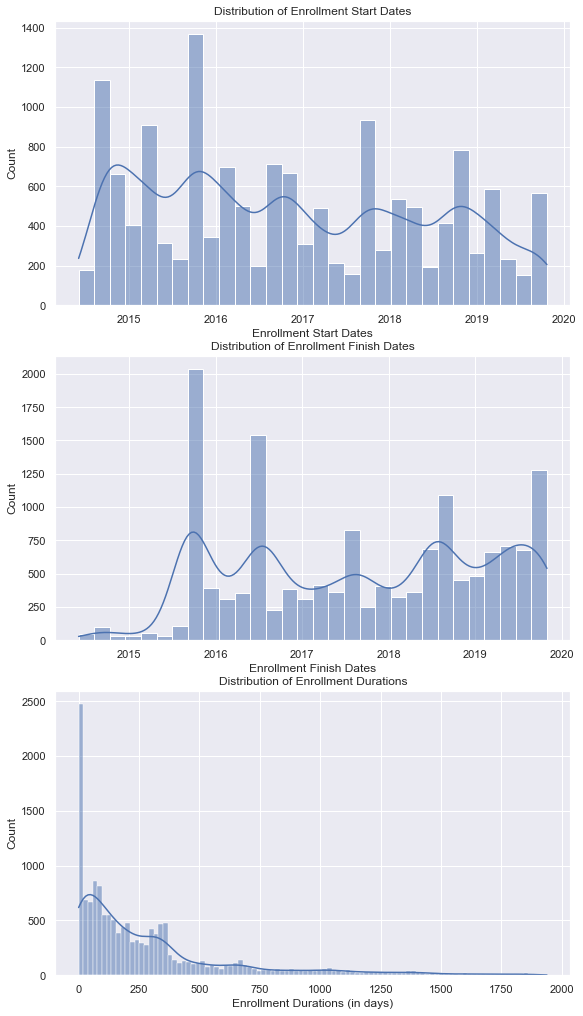

In [146]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 14))

# Plot the distribution of 'EnrollmentStart' dates
sns.histplot(df['EnrollmentStart'], bins=30, kde=True, label='Enrollment Start', ax=axes[0])
axes[0].set_title('Distribution of Enrollment Start Dates')
axes[0].set_xlabel('Enrollment Start Dates')
axes[0].set_ylabel('Count')

# Plot the distribution of 'EnrollmentFinish' dates
sns.histplot(df['EnrollmentFinish'], bins=30, kde=True, label='Enrollment Finish', ax=axes[1])
axes[1].set_title('Distribution of Enrollment Finish Dates')
axes[1].set_xlabel('Enrollment Finish Dates')
axes[1].set_ylabel('Count')


sns.histplot(df['EnrollmentDuration'], bins=100, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Enrollment Durations')
axes[2].set_xlabel('Enrollment Durations (in days)')
axes[2].set_ylabel('Count')
plt.tight_layout()
plt.show()

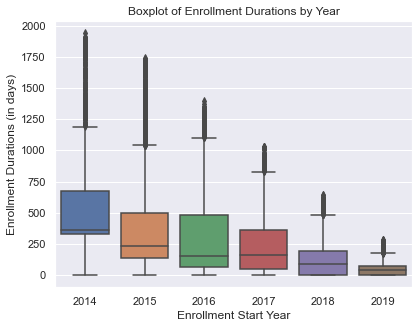

In [147]:
# Boxplot with KDE
sns.boxplot(data=df, x='EnrollmentStartYear', y='EnrollmentDuration', showfliers=True)  # Set showfliers=False to exclude outliers
# sns.stripplot(data=df, x='EnrollmentStartYear', y='EnrollmentDuration', color='black', alpha=0.5, jitter=0.2)  # Add strip plot for individual data points
plt.title('Boxplot of Enrollment Durations by Year')
plt.xlabel('Enrollment Start Year')
plt.ylabel('Enrollment Durations (in days)')
plt.show()

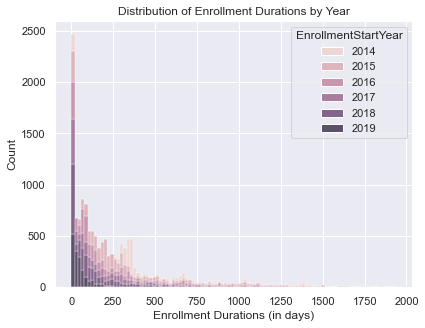

In [148]:
sns.histplot(data=df, x='EnrollmentDuration', bins=100,  hue='EnrollmentStartYear', multiple='stack')
plt.title('Distribution of Enrollment Durations by Year')
plt.xlabel('Enrollment Durations (in days)')
plt.ylabel('Count')
plt.show()

In [149]:
df[df['EnrollmentDuration'] == 0]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,NumberActivities,EnrollmentStartYear,EnrollmentDuration,LastPeriodDuration
25,10025,13,Female,0.0,2015-09-09,2015-09-09,2019-07-01,2019-12-31,2019-10-26,5,...,6.28,3,4,0.0,0,0,1.0,2015,0,183
36,10036,13,Female,0.0,2014-10-02,2014-10-02,2019-07-01,2019-12-31,2019-10-22,9,...,17.14,5,5,1.0,1,0,3.0,2014,0,183
38,10038,38,Female,1910.0,2018-09-29,2018-09-29,2019-07-01,2019-12-31,2019-10-30,1,...,26.13,25,1,0.0,0,0,1.0,2018,0,183
49,10049,56,Male,6540.0,2018-09-03,2018-09-03,2019-07-01,2019-12-31,2019-10-29,2,...,60.97,32,1,0.0,0,0,1.0,2018,0,183
51,10051,12,Female,0.0,2018-08-17,2018-08-17,2019-07-01,2019-12-31,2019-10-28,3,...,34.84,4,2,0.0,0,0,2.0,2018,0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14918,24918,73,Male,3870.0,2014-12-10,2014-12-10,2019-07-01,2019-12-31,2019-10-31,0,...,60.97,45,5,0.0,0,0,2.0,2014,0,183
14919,24919,1,Female,0.0,2019-07-18,2019-07-18,2019-07-01,2019-12-31,2019-10-31,0,...,17.14,7,1,0.0,0,0,1.0,2019,0,183
14926,24926,24,Female,3290.0,2018-10-08,2018-10-08,2019-01-01,2019-12-31,2019-10-29,2,...,17.42,7,1,0.0,0,0,1.0,2018,0,364
14937,24937,14,Male,0.0,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,...,34.84,8,3,0.0,0,0,1.0,2016,0,183


We can see that there are a lot of customers having enrollment start and finish as a same date, but their last visit is bigger date, so we can use this date is better approximation of the end of enrollment since we doubt there is better data

In [150]:
df.loc[df['EnrollmentDuration'] == 0, 'EnrollmentFinish'] = df.loc[df['EnrollmentDuration'] == 0, 'DateLastVisit']
# recalculate enrollemnt duration 
df['EnrollmentDuration'] = (df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days

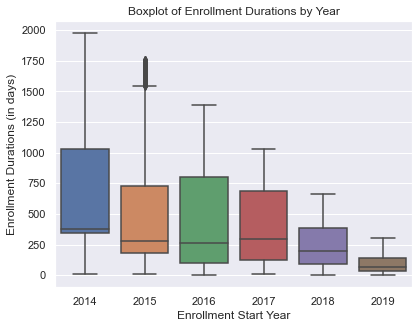

In [151]:
# Boxplot with KDE
sns.boxplot(data=df, x='EnrollmentStartYear', y='EnrollmentDuration', showfliers=True)  # Set showfliers=False to exclude outliers
# sns.stripplot(data=df, x='EnrollmentStartYear', y='EnrollmentDuration', color='black', alpha=0.5, jitter=0.2)  # Add strip plot for individual data points
plt.title('Boxplot of Enrollment Durations by Year')
plt.xlabel('Enrollment Start Year')
plt.ylabel('Enrollment Durations (in days)')
plt.show()

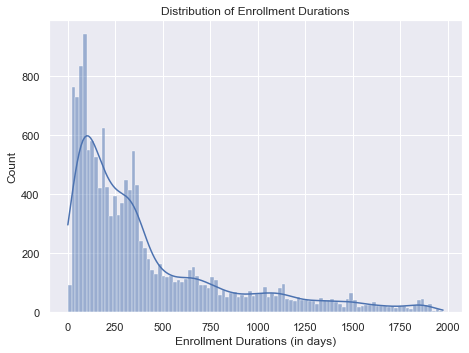

In [152]:
sns.histplot(df['EnrollmentDuration'], bins=100, kde=True)
plt.title('Distribution of Enrollment Durations')
plt.xlabel('Enrollment Durations (in days)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

What we see from this beautiful distributions is that boxes with bigger year has distributions closer to 0 - that makes sense because elder clients had higher chance of staying for a long time and newer clients have just enrolled. However, we still have potential to attract some of these people back if they stop visiting our club. 

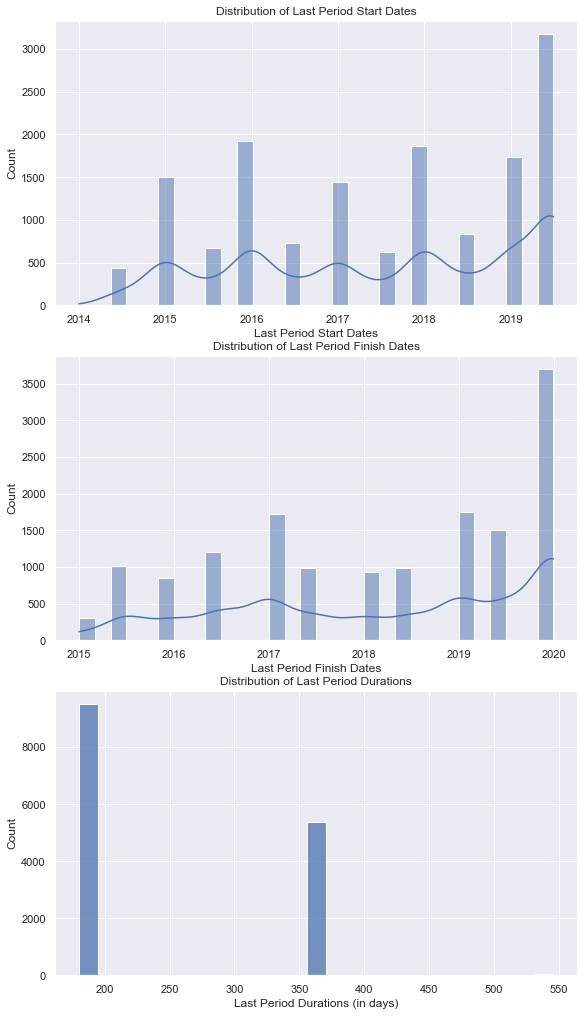

In [153]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 14))

# Plot the distribution of 'EnrollmentStart' dates
sns.histplot(df['LastPeriodStart'], bins=30, kde=True, label='Last Period Start', ax=axes[0])
axes[0].set_title('Distribution of Last Period Start Dates')
axes[0].set_xlabel('Last Period Start Dates')
axes[0].set_ylabel('Count')

# Plot the distribution of 'EnrollmentFinish' dates
sns.histplot(df['LastPeriodFinish'], bins=30, kde=True, label='Last Period Finish', ax=axes[1])
axes[1].set_title('Distribution of Last Period Finish Dates')
axes[1].set_xlabel('Last Period Finish Dates')
axes[1].set_ylabel('Count')


sns.histplot(df['LastPeriodDuration'],   ax=axes[2])
axes[2].set_title('Distribution of Last Period Durations')
axes[2].set_xlabel('Last Period Durations (in days)')
axes[2].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [154]:
df[df['DateLastVisit'] > df['LastPeriodFinish']]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,NumberActivities,EnrollmentStartYear,EnrollmentDuration,LastPeriodDuration
23,10023,24,Male,1710.0,2016-10-13,2019-10-31,2018-01-01,2018-12-31,2019-10-25,6,...,26.13,11,3,0.0,0,1,1.0,2016,1113,364
98,10098,35,Male,6490.0,2015-09-14,2016-07-08,2016-01-01,2016-06-30,2016-07-08,0,...,59.99,4,0,0.0,0,1,1.0,2015,298,181
223,10223,51,Male,5640.0,2014-09-10,2019-09-20,2017-01-01,2017-12-31,2019-09-20,41,...,17.42,3,5,0.0,0,0,1.0,2014,1836,364
236,10236,19,Female,1190.0,2019-02-28,2019-10-30,2019-01-01,2019-06-30,2019-10-30,1,...,60.97,12,1,0.0,0,0,1.0,2019,244,180
279,10279,3,Female,0.0,2018-01-15,2019-10-23,2018-01-01,2018-12-31,2019-10-23,8,...,17.42,1,2,0.0,0,0,1.0,2018,646,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14404,24404,8,Female,0.0,2018-09-22,2019-10-19,2019-01-01,2019-06-30,2019-10-19,12,...,17.42,6,1,0.0,0,0,1.0,2018,392,180
14437,24437,21,Male,2210.0,2019-02-13,2019-10-30,2019-01-01,2019-06-30,2019-10-30,1,...,60.97,12,1,0.0,0,0,1.0,2019,259,180
14576,24576,22,Female,1950.0,2016-09-20,2019-10-30,2019-01-01,2019-06-30,2019-10-30,1,...,60.97,18,3,0.0,0,0,1.0,2016,1135,180
14613,24613,23,Female,1520.0,2016-09-14,2019-10-30,2019-01-01,2019-06-30,2019-10-30,1,...,60.97,6,3,0.0,0,0,1.0,2016,1141,180


it seems like this variable is not useful since it only represents 0.5, 1 or 1,5 years and most of people are in two first groups

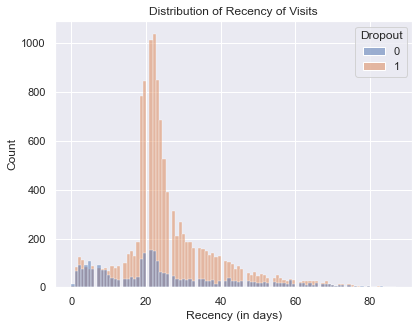

In [155]:
#creating recency variable that represents difference between last visit and biggest date of last visit in dataset

df['Recency'] = (df['DateLastVisit'].max() - df['DateLastVisit']).dt.days

sns.histplot(data=df, x='Age', bins=100, hue = 'Dropout')
plt.title('Distribution of Recency of Visits')
plt.xlabel('Recency (in days)')
plt.ylabel('Count')
plt.show()

A lot of people in data have recent visits, which means that are still active customers and probably we will spend less money on promotions for them

#### Other metric columns

In [156]:
df.drop(columns = binary_columns ).nunique()

ID                            14942
Age                              88
Income                          737
EnrollmentStart                1490
EnrollmentFinish                874
LastPeriodStart                  12
LastPeriodFinish                 11
DateLastVisit                  1384
DaysWithoutFrequency            660
LifetimeValue                  5668
NumberOfFrequencies             415
AttendedClasses                 230
AllowedWeeklyVisitsBySLA          7
AllowedNumberOfVisitsBySLA      270
RealNumberOfVisits               60
NumberOfRenewals                  7
NumberOfReferences                4
Dropout                           2
NumberActivities                  6
EnrollmentStartYear               6
EnrollmentDuration             1717
LastPeriodDuration                6
Recency                        1384
dtype: int64

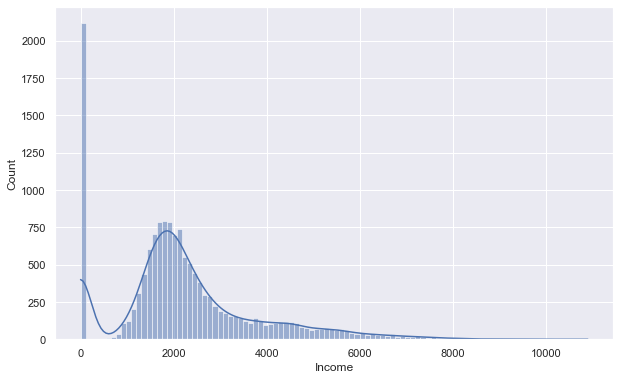

In [157]:
i = 'Income'
plt.figure(figsize=(10, 6))
sns.histplot(df[i], bins=100, kde=True)
plt.show()

seems like a lot of people has 0 income that might mean that these people dont work - tey are teen agers or students

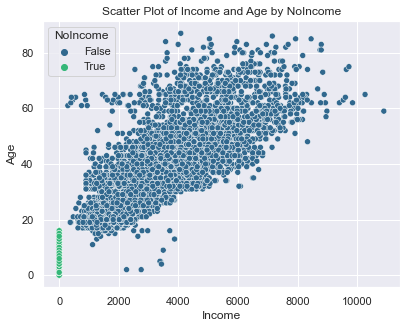

In [158]:
df['NoIncome'] = df['Income'] == 0
sns.scatterplot(data=df, x='Income', y='Age', hue='NoIncome', palette='viridis')
plt.title('Scatter Plot of Income and Age by NoIncome')
plt.show()

In [159]:
i = 'NumberOfReferences'
df[i].value_counts()

0    14646
1      267
2       21
3        8
Name: NumberOfReferences, dtype: int64

Almost all people did 0 or 1 reference, so this column doesnt seem important and will not help with clustering

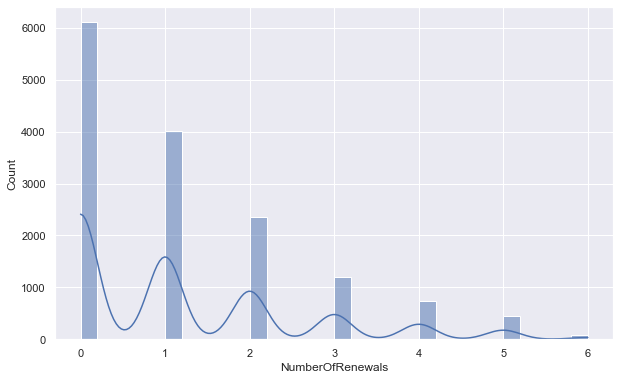

In [160]:
i = 'NumberOfRenewals'
plt.figure(figsize=(10, 6))
sns.histplot(df[i], bins=30, kde=True)
plt.show()

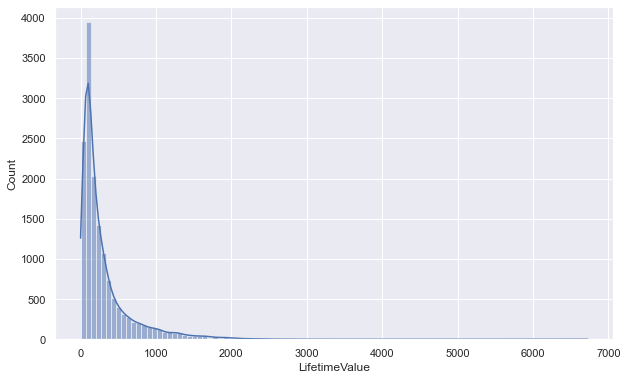

In [161]:
i = 'LifetimeValue'
plt.figure(figsize=(10, 6))
sns.histplot(df[i], bins=100, kde=True)
plt.show()

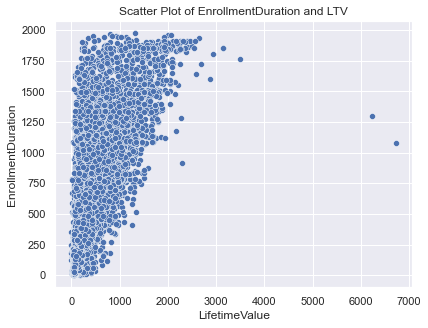

In [162]:
sns.scatterplot(data=df, x='LifetimeValue', y='EnrollmentDuration')
plt.title('Scatter Plot of EnrollmentDuration and LTV')
plt.show()

We see that there is correllation - the longer the person is client, the more money he spent. It makes sense. But for us it might be useful to see if there are people who spend more money not only in total but by unit of time.

#### Cost of the day

In [163]:
# we need to fill missing values in AllowedWeeklyVisitsBySLA since this column is better representation of allowed 
# number of visits than AllowedNumberOfVisitsBySLA which is very noisy - however ше can help fill missing values in weekly sla
X = df[['AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA']]
imputer = KNNImputer(n_neighbors=100) 
X_imputed = imputer.fit_transform(X)
df['AllowedWeeklyVisitsBySLA'] = np.round(X_imputed[:, 0])

In [164]:
# We know enrollement duration and LTV of customer, so we can approximate his Cost of the day as
# LTV/EnrollmentDuration
# Also we can multiple this number by sla converted to the part of period allowed to visit 
# To make it efficient cost of the day - since 7day and 2 day tarrifs definetely cost different money
df['AllowedWeeklyVisitsBySLA'].value_counts()

7.0    10830
2.0     2378
4.0      769
1.0      554
3.0      248
6.0      133
5.0       30
Name: AllowedWeeklyVisitsBySLA, dtype: int64

In [165]:
sla_part_period = df['AllowedWeeklyVisitsBySLA']/7

df['CostOfDay'] = df['LifetimeValue']/(df['EnrollmentDuration'] * sla_part_period)

Median: [0.9174354895722869]
Q1: [0.5582291585388962]
Q3: [1.803030303030303]
Whisker Low: [0.5582291585388962]
Whisker High: [3.669883040935673]


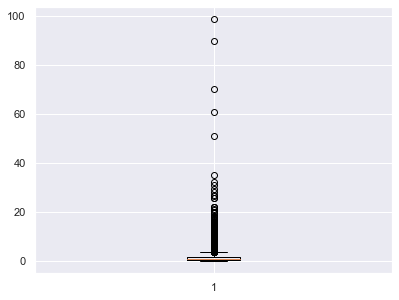

In [166]:
i = 'CostOfDay'
boxplot_dict = plt.boxplot(df[i])

medians = [median.get_ydata()[0] for median in boxplot_dict['medians']]
q1s = [q1.get_ydata()[0] for q1 in boxplot_dict['boxes']]
q3s = [q3.get_ydata()[2] for q3 in boxplot_dict['boxes']]
whisker_low = [whiskers.get_ydata()[0] for whiskers in boxplot_dict['whiskers'][::2]]
whisker_high = [whiskers.get_ydata()[1] for whiskers in boxplot_dict['whiskers'][1::2]]
print("Median:", medians)
print("Q1:", q1s)
print("Q3:", q3s)
print("Whisker Low:", whisker_low)
print("Whisker High:", whisker_high)

plt.show()

In [167]:
print('Percentage of data inside whiskers:', np.round(len(df[(df[i] > whisker_low[0]) & (df[i] < whisker_high[0])])/len(df),3))

Percentage of data inside whiskers: 0.634



We see that there are a lot of outliers inside this variable, 
but most spendings are distributed around 0-2, so our distribitution has very heavy tail. If distribution of variable is normal more than 99% of it is lies inside whiskers, but here we have 63%. That means that there are more than 40% of people who spend extremely a lot per unit of time compared to others. Let's explore who are they

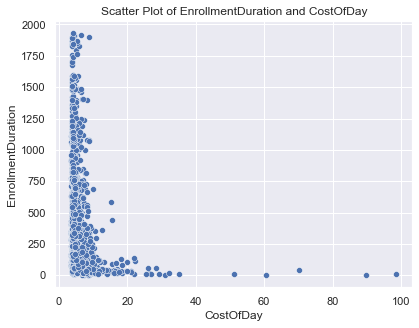

In [168]:
sns.scatterplot(data=df[df['CostOfDay'] > whisker_high[0]], 
                x='CostOfDay', 
                y='EnrollmentDuration')
plt.title('Scatter Plot of EnrollmentDuration and CostOfDay')
plt.show()

In [169]:
df[df['CostOfDay'] > 10][['AllowedWeeklyVisitsBySLA','NumberOfFrequencies', 'CostOfDay', 'EnrollmentDuration', 'LifetimeValue']].describe()

,AllowedWeeklyVisitsBySLA,NumberOfFrequencies,CostOfDay,EnrollmentDuration,LifetimeValue
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2.250000,5.750000,18.317591,64.666667,214.863750
std,1.753193,8.746729,14.816198,92.547077,214.230832
min,1.000000,1.000000,10.030682,1.000000,38.600000
25%,1.000000,2.000000,11.125463,21.750000,71.700000
50%,2.000000,3.000000,13.287660,36.000000,103.475000
75%,3.000000,6.000000,18.417747,61.000000,304.800000
max,7.000000,71.000000,98.525000,581.000000,1261.600000


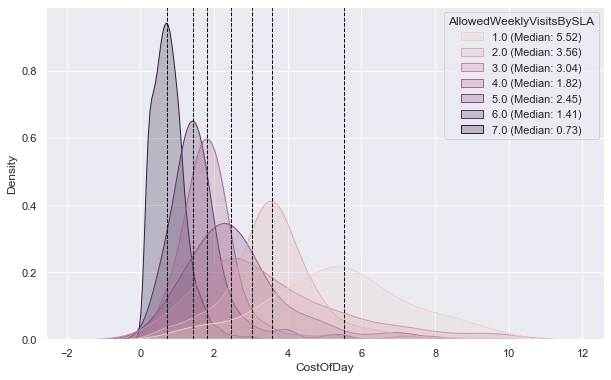

In [170]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['CostOfDay'] < 10], x='CostOfDay', hue='AllowedWeeklyVisitsBySLA', fill=True, common_norm=False)


medians = df.groupby('AllowedWeeklyVisitsBySLA')['CostOfDay'].median()
for category, median_value in medians.items():
    plt.axvline(median_value, color='black', linestyle='dashed', linewidth=1, label=f'Median {category}')
handles, labels = plt.gca().get_legend().legend_handles, medians.index

legend_labels = [f'{label} (Median: {medians[label]:.2f})' for label in labels]
plt.legend(handles=handles, labels=legend_labels, title='AllowedWeeklyVisitsBySLA')

plt.show()

The lower amount of visits per week the higher the cost of the day - seems true, since tariffs are normally done this way

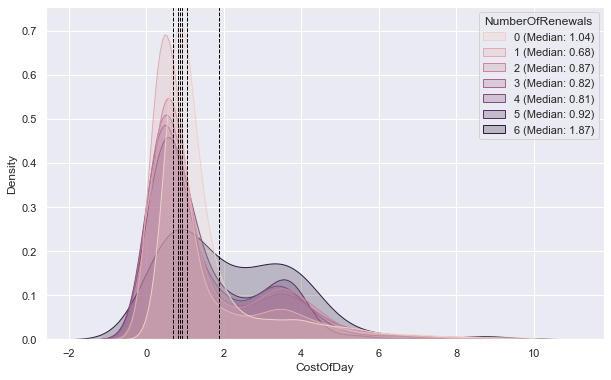

In [171]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['CostOfDay'] < 10], x='CostOfDay', hue='NumberOfRenewals', fill=True, common_norm=False)


medians = df.groupby('NumberOfRenewals')['CostOfDay'].median()
for category, median_value in medians.items():
    plt.axvline(median_value, color='black', linestyle='dashed', linewidth=1, label=f'Median {category}')
handles, labels = plt.gca().get_legend().legend_handles, medians.index

legend_labels = [f'{label} (Median: {medians[label]:.2f})' for label in labels]
plt.legend(handles=handles, labels=legend_labels, title='NumberOfRenewals')

plt.show()

We see that these people with extremely high spendings per day are not staying for a long time normally (< 1 year). And those extreme outliers (>10 ) are the ones who stayed just for a few days and come very few times. This is definitely not the target audience

However, some people may stay not the whole period of enrollment but have two or more separate enrollments inside with different lengths and pauses, but we dont have access to this info, so we this is the best approximation we can have (however from the plot above we don't see radical differences in plot shapes and medians of the cost by amount of renewals - meaning that approximation we use is quite good)

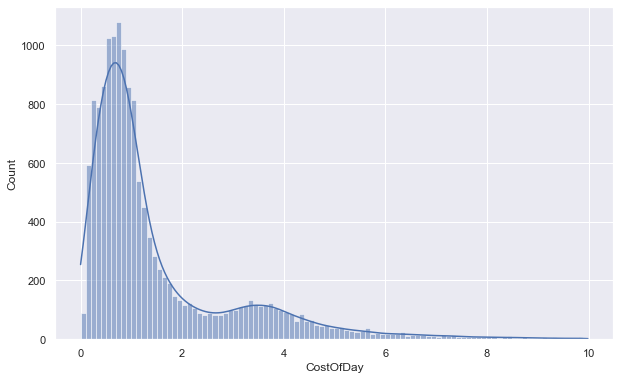

In [172]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df[i] < 10][i], bins=100, kde=True)
plt.show()

#### Cost of visit

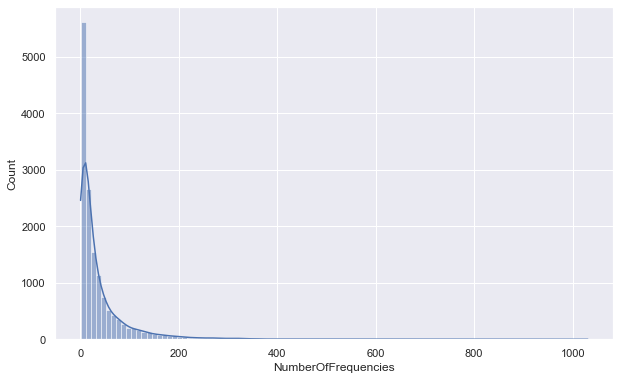

In [173]:
i = 'NumberOfFrequencies'
plt.figure(figsize=(10, 6))
sns.histplot(df[i], bins=100, kde=True)
plt.show()

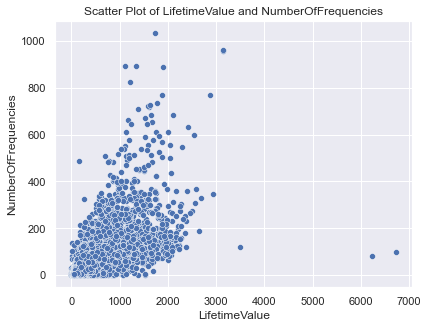

In [174]:
sns.scatterplot(data=df, x='LifetimeValue', y='NumberOfFrequencies')
plt.title('Scatter Plot of LifetimeValue and NumberOfFrequencies')
plt.show()

We also can measure cost of visit per person and check if it is correlated with cost per day - so we can define if there are people how tend to be loyal (have long enrollment period) but they dont really use facilities

In [175]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'NumberActivities',
       'EnrollmentStartYear', 'EnrollmentDuration', 'LastPeriodDuration',
       'Recency', 'NoIncome', 'CostOfDay'],
      dtype='object')

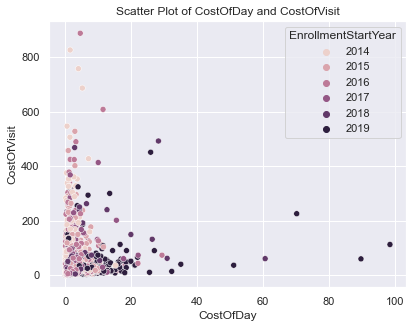

In [176]:
df['CostOfVisit'] = df['LifetimeValue']/(df['NumberOfFrequencies'])

#Let's plot only those who came at least once
sns.scatterplot(data=df[df['NumberOfFrequencies'] > 0], x='CostOfDay', y='CostOfVisit', hue = 'EnrollmentStartYear')
plt.title('Scatter Plot of CostOfDay and CostOfVisit')
plt.show()

We see that there is visible no relation here - that means that even if people stay with us for a long time (so their cost per day is not that big even with large spendings) it doesnt mean that they go to gym during these periods. There are people whose cost of visit is >100 times bigger than the cost of visit of a person who has same cost of day! 

#### Gymlovers and Classlovers

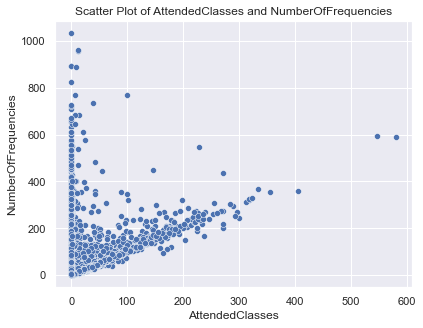

In [177]:
#since there are people that not even came once we will add 1 to number of visits to handle denominator problem
sns.scatterplot(data=df, x='AttendedClasses', y='NumberOfFrequencies')
plt.title('Scatter Plot of AttendedClasses and NumberOfFrequencies')
plt.show()

We see from this chart that there are to groups of people - ones who come for classes and ones who just go to the gym(in the left corner) - that can also help us identify gymlovers and classlovers

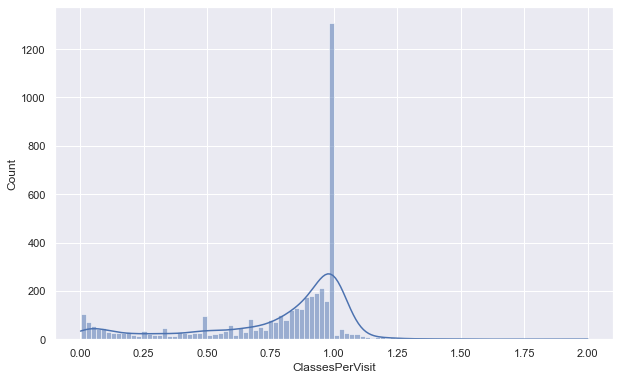

In [178]:
#Let's create a variable which will handle these people

df['ClassesPerVisit'] = df['AttendedClasses']/df['NumberOfFrequencies']

#Plot for those who attended at least one class
i = 'ClassesPerVisit'
plt.figure(figsize=(10, 6))
sns.histplot(df[df['AttendedClasses'] > 0 ][i], bins=100, kde=True)
plt.show()

We see that there are real classgoers - people who come onlt to attend classes or even attend more than 2 classes

#### Last period activity

activity during last months of registration of customers may be an important measure for clusterisation too - so we can do similar analysis of visits but during last two months of it. 

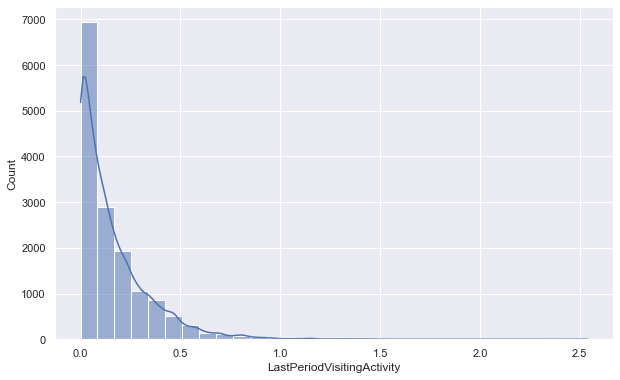

In [179]:
#Let's create this variable since it reflects person's activity better than just number of visits


df['LastPeriodVisitingActivity'] = df['RealNumberOfVisits']/df['AllowedNumberOfVisitsBySLA']

i = 'LastPeriodVisitingActivity'
plt.figure(figsize=(10, 6))
sns.histplot(df[i], bins=30, kde=True)
plt.show()

Numbers close to 0 indicate people who gave up their visit and didn't attend during last months - these might be the guys who always buy membership and then forget about it

#### Correlation matrix and highly correlated variables

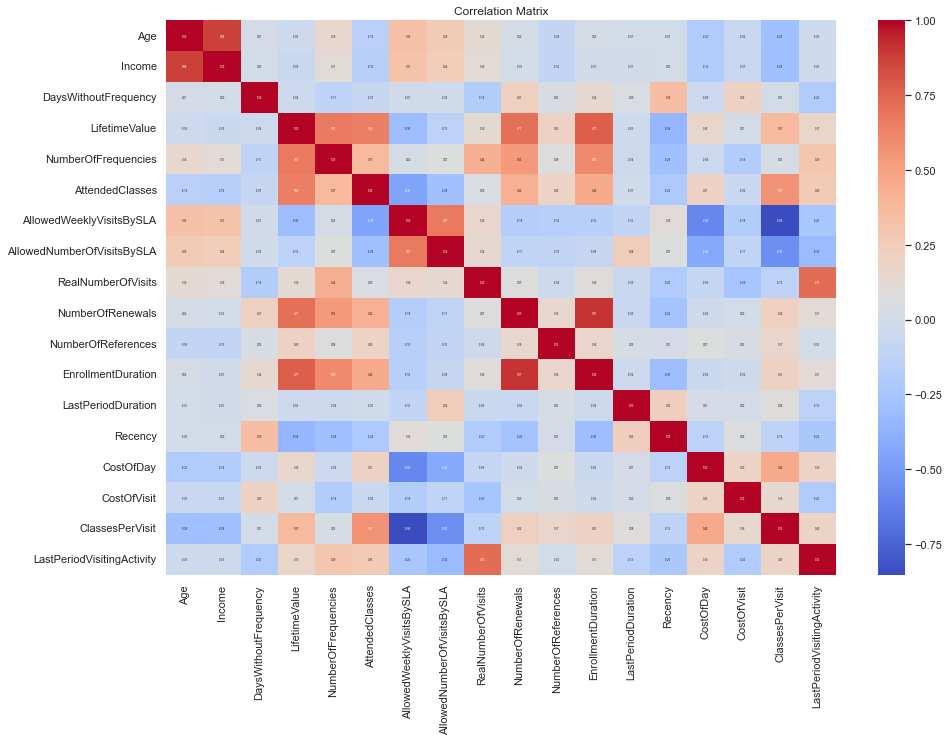

In [180]:
#Let's build correlation matrix with all numeric variables we have
metric_columns = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'NumberOfReferences', 
       'EnrollmentDuration', 'LastPeriodDuration', 'Recency', 
       'CostOfDay', 'CostOfVisit', 
       'ClassesPerVisit', 'LastPeriodVisitingActivity']
# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df[metric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

'DaysWithoutFrequency' - it doesnt seems like this variable might reflect any patterns among customers since its just some internal measurement|

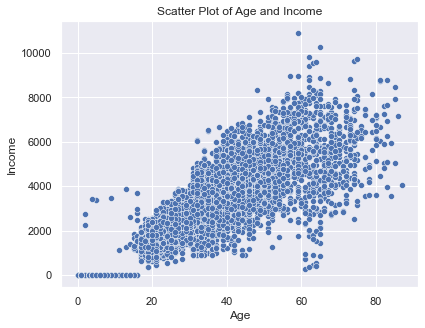

In [181]:
sns.scatterplot(data=df, x='Age', y='Income')
plt.title('Scatter Plot of Age and Income')
plt.show()

There is very strong correlation between age and income, so one of the variables might be redundant. However, age and income might be both important since they handle different aspects of customer portrait

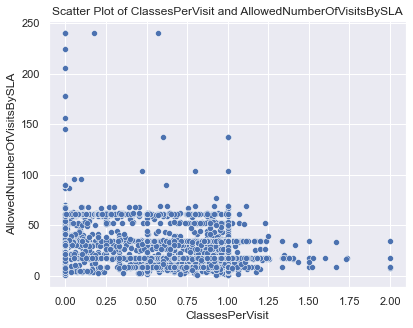

In [182]:
sns.scatterplot(data=df, x='ClassesPerVisit', y='AllowedNumberOfVisitsBySLA')
plt.title('Scatter Plot of ClassesPerVisit and AllowedNumberOfVisitsBySLA')
plt.show()

In case of these two variables there are just some outliers that create weird negative distribution, however, there is no practical sense in this correlation. And we are not going to use AllowedNumberOfVisitsBySLA for clustering since it has nothing to do with client portrait

### Missing values and change of variables

In [183]:
df.isna().sum()/df.shape[0]

ID                            0.000000
Age                           0.000000
Gender                        0.000000
Income                        0.033128
EnrollmentStart               0.000000
EnrollmentFinish              0.000000
LastPeriodStart               0.000000
LastPeriodFinish              0.000000
DateLastVisit                 0.000000
DaysWithoutFrequency          0.000000
LifetimeValue                 0.000000
UseByTime                     0.000000
AthleticsActivities           0.002409
WaterActivities               0.002476
FitnessActivities             0.002342
TeamActivities                0.002342
RacketActivities              0.002476
CombatActivities              0.002209
SpecialActivities             0.002945
OtherActivities               0.002342
NumberOfFrequencies           0.001740
AttendedClasses               0.000000
AllowedWeeklyVisitsBySLA      0.000000
AllowedNumberOfVisitsBySLA    0.000000
RealNumberOfVisits            0.000000
NumberOfRenewals         

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          14942 non-null  int64         
 1   Age                         14942 non-null  int64         
 2   Gender                      14942 non-null  object        
 3   Income                      14447 non-null  float64       
 4   EnrollmentStart             14942 non-null  datetime64[ns]
 5   EnrollmentFinish            14942 non-null  datetime64[ns]
 6   LastPeriodStart             14942 non-null  datetime64[ns]
 7   LastPeriodFinish            14942 non-null  datetime64[ns]
 8   DateLastVisit               14942 non-null  datetime64[ns]
 9   DaysWithoutFrequency        14942 non-null  int64         
 10  LifetimeValue               14942 non-null  float64       
 11  UseByTime                   14942 non-null  int64     

very few missing values compared to dataset size, so we can impute them using knn imputer for most cases or simpler techinques

In [185]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# No we have more metric features that define a person so we will use them
features_for_transform = ['Age', 'Income',  'RealNumberOfVisits', 'NumberOfRenewals',
     'NumberOfReferences', 'NumberOfFrequencies',
       'EnrollmentDuration', 'LastPeriodDuration', 'Recency', 
       'CostOfDay', 'CostOfVisit', 'ClassesPerVisit',
       'LastPeriodVisitingActivity']

df_for_transform = df[features_for_transform]

scaler = MinMaxScaler()
scaled_df_for_transform = scaler.fit_transform(df_for_transform)

imputer = KNNImputer(n_neighbors=15)
imputed_data = pd.DataFrame(imputer.fit_transform(scaled_df_for_transform), columns = features_for_transform)

imputed_data_train = scaler.inverse_transform(imputed_data)

df[features_for_transform] = imputed_data_train
df[['Age', 'Income',  'RealNumberOfVisits', 'NumberOfRenewals',
     'NumberOfReferences', 'NumberOfFrequencies',
       'EnrollmentDuration', 'LastPeriodDuration', 'Recency']] = np.round(df[['Age', 'Income',  'RealNumberOfVisits', 'NumberOfRenewals',
     'NumberOfReferences', 'NumberOfFrequencies',
       'EnrollmentDuration', 'LastPeriodDuration', 'Recency']])

df

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,NumberActivities,EnrollmentStartYear,EnrollmentDuration,LastPeriodDuration,Recency,NoIncome,CostOfDay,CostOfVisit,ClassesPerVisit,LastPeriodVisitingActivity
0,10000,60.0,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,1.0,2019,58.0,183.0,1.0,False,3.594540,9.927778,0.777778,0.318471
1,10001,29.0,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,1.0,2014,398.0,364.0,1568.0,False,4.214070,20.834783,0.043478,0.057405
2,10002,23.0,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,1.0,2017,30.0,180.0,889.0,False,1.253333,6.266667,0.000000,0.199800
3,10003,9.0,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,1.0,2018,160.0,364.0,283.0,True,3.399375,7.770000,0.100000,0.169300
4,10004,35.0,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,1.0,2016,778.0,180.0,721.0,False,0.479692,9.102439,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14937,24937,14.0,Male,0.0,2016-09-08,2019-10-29,2019-07-01,2019-12-31,2019-10-29,2,...,1.0,2016,1146.0,183.0,2.0,True,2.230181,13.039732,0.857143,0.229621
14938,24938,39.0,Male,3529.0,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38,...,1.0,2015,261.0,181.0,1282.0,False,1.317433,6.032456,0.000000,0.049205
14939,24939,20.0,Male,1810.0,2017-03-01,2017-03-31,2017-01-01,2017-06-30,2017-03-29,2,...,1.0,2017,30.0,180.0,946.0,False,1.453333,7.266667,0.000000,0.266400
14940,24940,55.0,Male,4800.0,2018-03-01,2019-10-28,2019-07-01,2019-12-31,2019-10-28,3,...,1.0,2018,606.0,183.0,3.0,False,3.036414,4.262703,0.837838,0.441084


In [186]:
#recalculate some features that were dependant on columns with missing values

df['CostOfDay'] = df['LifetimeValue']/df['EnrollmentDuration']
df['CostOfVisit'] = df['LifetimeValue']/(df['NumberOfFrequencies'])
df['ClassesPerVisit'] = df['AttendedClasses']/df['NumberOfFrequencies']

In [187]:
#fillna in binaries with mode
df[['AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities']] = df[['AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities']].apply(lambda x: x.fillna(x.mode()[0]))

# Fix this column based on another one
df['HasReferences'] = df['NumberOfReferences'].apply(lambda x: 0 if x == 0 else 1)

In [188]:
df.isna().sum()/df.shape[0]

ID                            0.0
Age                           0.0
Gender                        0.0
Income                        0.0
EnrollmentStart               0.0
EnrollmentFinish              0.0
LastPeriodStart               0.0
LastPeriodFinish              0.0
DateLastVisit                 0.0
DaysWithoutFrequency          0.0
LifetimeValue                 0.0
UseByTime                     0.0
AthleticsActivities           0.0
WaterActivities               0.0
FitnessActivities             0.0
TeamActivities                0.0
RacketActivities              0.0
CombatActivities              0.0
SpecialActivities             0.0
OtherActivities               0.0
NumberOfFrequencies           0.0
AttendedClasses               0.0
AllowedWeeklyVisitsBySLA      0.0
AllowedNumberOfVisitsBySLA    0.0
RealNumberOfVisits            0.0
NumberOfRenewals              0.0
HasReferences                 0.0
NumberOfReferences            0.0
Dropout                       0.0
NumberActiviti

### EDA

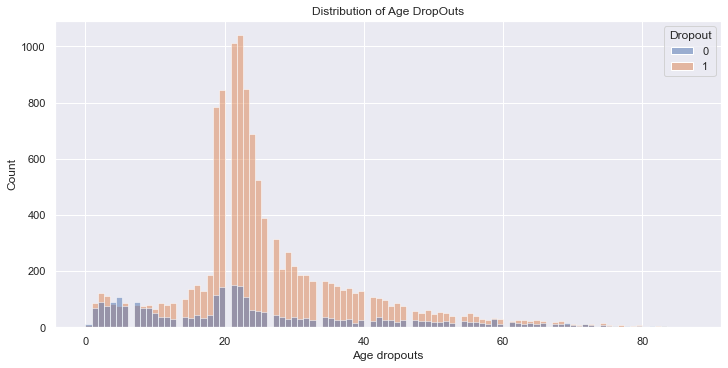

In [189]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))

sns.histplot(data=df, x='Age', bins=100, hue = 'Dropout')
plt.title('Distribution of Age DropOuts')
plt.xlabel('Age dropouts')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [190]:
ages = []
for i in range(0, len(df)):
    ages.append(int(df['Age'].iloc[i] - df['EnrollmentDuration'].iloc[i]/360))
df['AgeStart'] = ages

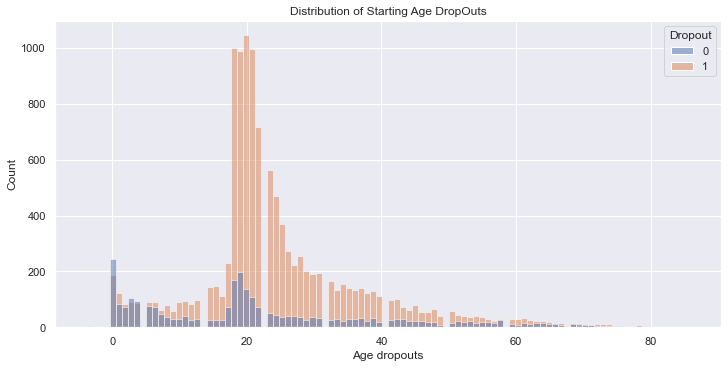

In [191]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))

sns.histplot(data=df, x='AgeStart', bins=100, hue = 'Dropout')
plt.title('Distribution of Starting Age DropOuts')
plt.xlabel('Age dropouts')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

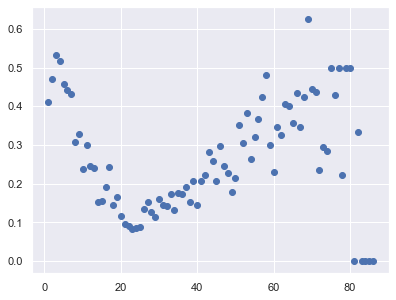

In [192]:
colors = sns.color_palette('pastel')[0:5]
df = df.loc[df['AgeStart']>0]
ageStart = df['AgeStart'].unique()
df.loc[df['Dropout']==0]
countAge=[]
for i in ageStart:
    countAge.append(len(df.loc[(df['AgeStart']==i )& (df['Dropout']==0)])/len(df.loc[(df['AgeStart']==i)]))
#create pie chart
plt.scatter(x=ageStart, y = countAge)

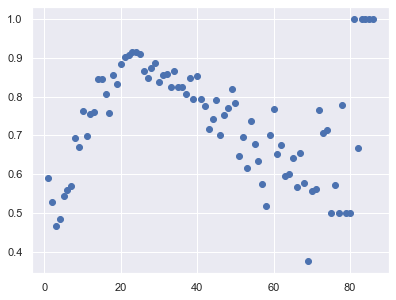

In [193]:
colors = sns.color_palette('pastel')[0:5]
df = df.loc[df['AgeStart']>0]
ageStart = df['AgeStart'].unique()
df.loc[df['Dropout']==0]
countAge=[]
for i in ageStart:
    countAge.append(len(df.loc[(df['AgeStart']==i )& (df['Dropout']==1)])/len(df.loc[(df['AgeStart']==i)]))
#create pie chart
plt.scatter(x=ageStart, y = countAge)

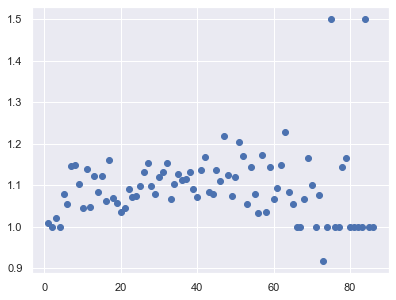

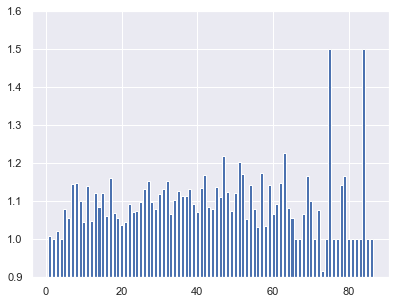

In [194]:
colors = sns.color_palette('pastel')[0:5]
df = df.loc[df['AgeStart']>0]
ageStart = df['AgeStart'].unique()
df.loc[df['Dropout']==0]
Activities=[]
for i in ageStart:
    Activities.append(df['NumberActivities'].loc[(df['AgeStart']==i )& (df['Dropout']==1)].mean())
    
plt.scatter(x=ageStart, y = Activities)
plt.show()
plt.bar(x=ageStart, height = Activities)
plt.ylim(0.9, 1.6)
plt.show()
    

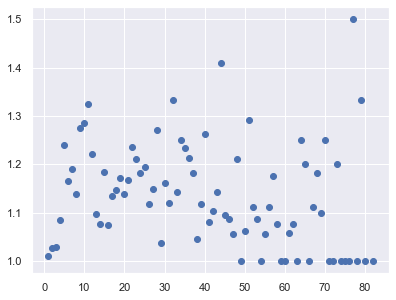

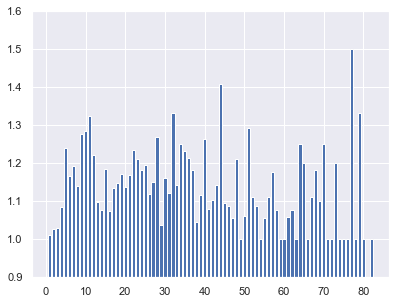

In [195]:
colors = sns.color_palette('pastel')[0:5]
df = df.loc[df['AgeStart']>0]
ageStart = df['AgeStart'].unique()
df.loc[df['Dropout']==0]
Activities=[]
for i in ageStart:
    Activities.append(df['NumberActivities'].loc[(df['AgeStart']==i )& (df['Dropout']==0)].mean())
    
plt.scatter(x=ageStart, y = Activities)
plt.show()
plt.bar(x=ageStart, height = Activities)
plt.ylim(0.9, 1.6)
plt.show()
    

### Outliers

In [196]:
df_clustering = df[['ID', 'Age', 'Income',  'RealNumberOfVisits', 'NumberOfRenewals',
     'NumberOfReferences', 'NumberOfFrequencies', 'NumberActivities',
       'EnrollmentDuration', 'Recency', 
       'CostOfDay', 'CostOfVisit', 'ClassesPerVisit',
       'LastPeriodVisitingActivity']]
df_clustering.set_index('ID', inplace = True)

#### Skewness, log and transformations

Age
Skewness: 1.2083208687810536


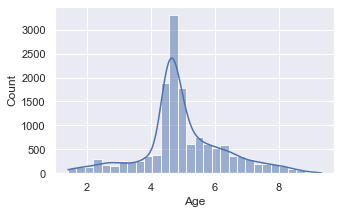

Income
Skewness: 1.0018888945316005


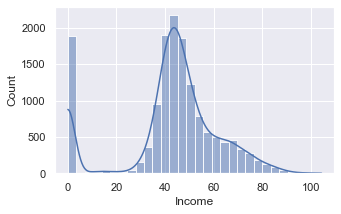

RealNumberOfVisits
Skewness: 2.8479661281367727


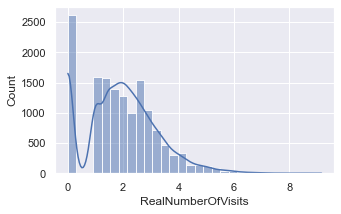

NumberOfRenewals
Skewness: 1.2165622138400436


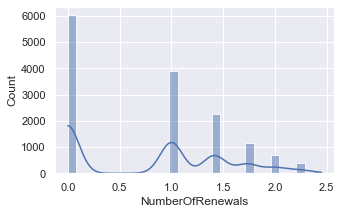

NumberOfReferences
Skewness: 9.66840022062338


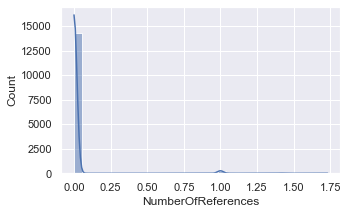

NumberOfFrequencies
Skewness: 4.871498141623112


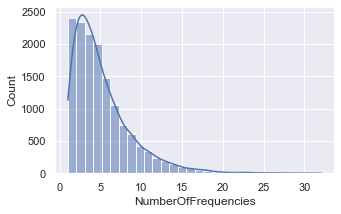

NumberActivities
Skewness: 3.461435224434733


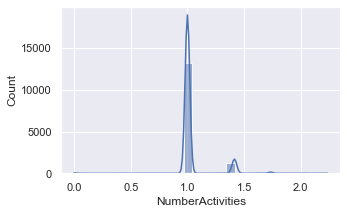

EnrollmentDuration
Skewness: 1.6066086116110159


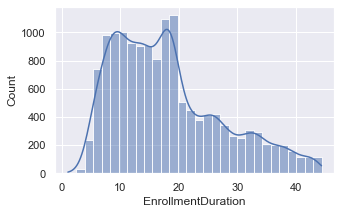

Recency
Skewness: 0.22684557143688067


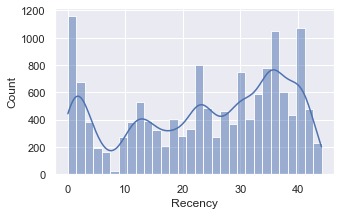

CostOfDay
Skewness: 42.62883098570853


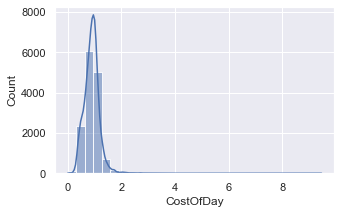

CostOfVisit
Skewness: 9.869247526085179


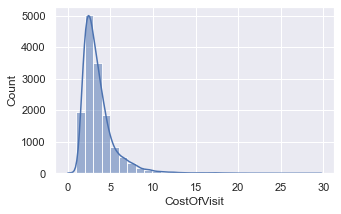

ClassesPerVisit
Skewness: 1.3713807139410454


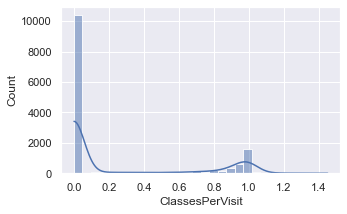

LastPeriodVisitingActivity
Skewness: 2.2755371813468193


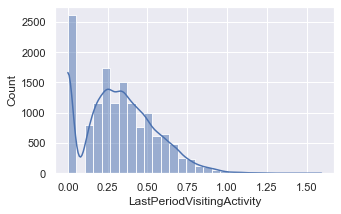

In [197]:
for k in range(len(df_clustering.columns)):
    i = df_clustering.columns[k]
    print(i)
    print("Skewness: {}".format(sc.skew(df_clustering[i])))
    plt.figure(figsize=(5, 3))
    sns.histplot(df_clustering[i]**0.5, bins=30, kde=True)
    plt.show()


We see that almost variables are skewed - so we will apply log or sqrt transformations to handle this for further clusterisation

Cost of day, cost of visit and number of frequencies are the ones that need log transformation before outliers detection and clusterisation. 

Also some variables with not that big skewness still have long right tail, so log transformation will be useful (Enrollment duration and Real Number of Visits)

Sqrt transformation will help in case of Age, Income, Number of renewals and LastPeriodVisitingActivity, as their tail is not that long but still causes problems for some clusterisation algorithms

From this plot we also see that Number of references is very poor(in terms of variability) variable, same problem happend with NumberActivities where almost all people have 1 or 2 as number, so column becomes binary. We will remove both

In [198]:
df_clustering.drop(columns = ['NumberOfReferences', 'NumberActivities'], inplace = True)

C:\Users\dggua\AppData\Local\Temp\ipykernel_23184\2157026330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering.drop(columns = ['NumberOfReferences', 'NumberActivities'], inplace = True)


In [199]:
print("Skewness CostOfDay before log: {}".format(sc.skew(df_clustering['CostOfDay'])))
print("Skewness CostOfVisit before log: {}".format(sc.skew(df_clustering['CostOfVisit'])))
print("Skewness NumberOfFrequencies before log: {}".format(sc.skew(df_clustering['NumberOfFrequencies'])))
print("Skewness RealNumberOfVisits before log: {}".format(sc.skew(df_clustering['RealNumberOfVisits'])))
print("Skewness EnrollmentDuration before log: {}".format(sc.skew(df_clustering['EnrollmentDuration'])))

df_clustering['NumberOfFrequencies'] = np.log1p(df_clustering['NumberOfFrequencies'])
df_clustering['CostOfDay'] = np.log1p(df_clustering['CostOfDay'])
df_clustering['CostOfVisit'] = np.log1p(df_clustering['CostOfVisit'])
df_clustering['RealNumberOfVisits'] = np.log1p(df_clustering['RealNumberOfVisits'])
df_clustering['EnrollmentDuration'] = np.log1p(df_clustering['EnrollmentDuration'])

print("Skewness CostOfDay after log: {}".format(sc.skew(df_clustering['CostOfDay'])))
print("Skewness CostOfVisit after log: {}".format(sc.skew(df_clustering['CostOfVisit'])))
print("Skewness NumberOfFrequencies after log: {}".format(sc.skew(df_clustering['NumberOfFrequencies'])))
print("Skewness RealNumberOfVisits after log: {}".format(sc.skew(df_clustering['RealNumberOfVisits'])))
print("Skewness EnrollmentDuration after log: {}".format(sc.skew(df_clustering['EnrollmentDuration'])))
print('\n')

print("Skewness Age before sqrt: {}".format(sc.skew(df_clustering['Age'])))
print("Skewness LastPeriodVisitingActivity before sqrt: {}".format(sc.skew(df_clustering['LastPeriodVisitingActivity'])))
print("Skewness NumberOfRenewals before sqrt: {}".format(sc.skew(df_clustering['NumberOfRenewals'])))
print("Skewness Income before sqrt: {}".format(sc.skew(df_clustering['Income'])))

df_clustering['Age'] = np.sqrt(df_clustering['Age'])
df_clustering['LastPeriodVisitingActivity'] = np.sqrt(df_clustering['LastPeriodVisitingActivity'])
df_clustering['NumberOfRenewals'] = np.sqrt(df_clustering['NumberOfRenewals'])
df_clustering['Income'] = np.sqrt(df_clustering['Income'])

print("Skewness Age after sqrt: {}".format(sc.skew(df_clustering['Age'])))
print("Skewness LastPeriodVisitingActivity after sqrt: {}".format(sc.skew(df_clustering['LastPeriodVisitingActivity'])))
print("Skewness NumberOfRenewals after sqrt: {}".format(sc.skew(df_clustering['NumberOfRenewals'])))
print("Skewness Income after sqrt: {}".format(sc.skew(df_clustering['Income'])))


Skewness CostOfDay before log: 42.62883098570853
Skewness CostOfVisit before log: 9.869247526085179
Skewness NumberOfFrequencies before log: 4.871498141623112
Skewness RealNumberOfVisits before log: 2.8479661281367727
Skewness EnrollmentDuration before log: 1.6066086116110159
Skewness CostOfDay after log: 1.5151099983935026
Skewness CostOfVisit after log: 0.9085144067745852
Skewness NumberOfFrequencies after log: 0.17546664233915688
Skewness RealNumberOfVisits after log: -0.02994886917191756
Skewness EnrollmentDuration after log: -0.1874824942986605


Skewness Age before sqrt: 1.2083208687810536
Skewness LastPeriodVisitingActivity before sqrt: 2.2755371813468193
Skewness NumberOfRenewals before sqrt: 1.2165622138400436
Skewness Income before sqrt: 1.0018888945316005
Skewness Age after sqrt: 0.20239445934744338
Skewness LastPeriodVisitingActivity after sqrt: 0.41710686421552884
Skewness NumberOfRenewals after sqrt: 0.2089857622103864
Skewness Income after sqrt: -0.7285973017477833


C:\Users\dggua\AppData\Local\Temp\ipykernel_23184\3311247378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['NumberOfFrequencies'] = np.log1p(df_clustering['NumberOfFrequencies'])
C:\Users\dggua\AppData\Local\Temp\ipykernel_23184\3311247378.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['CostOfDay'] = np.log1p(df_clustering['CostOfDay'])
C:\Users\dggua\AppData\Local\Temp\ipykernel_23184\3311247378.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

NumberOfFrequencies
Skewness: 0.17546664233915688


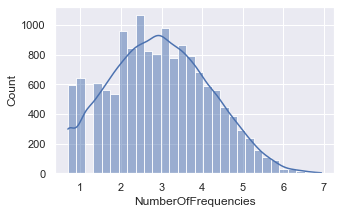

CostOfDay
Skewness: 1.5151099983935026


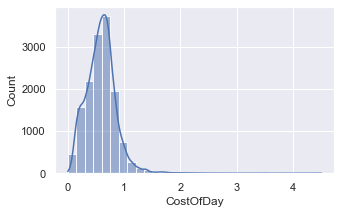

CostOfVisit
Skewness: 0.9085144067745852


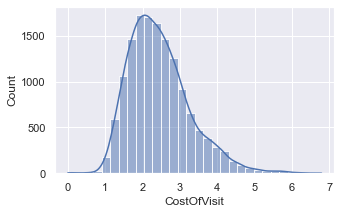

RealNumberOfVisits
Skewness: -0.02994886917191756


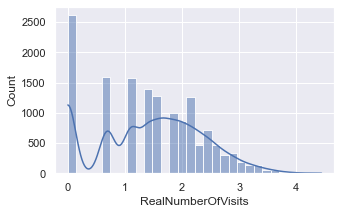

EnrollmentDuration
Skewness: -0.1874824942986605


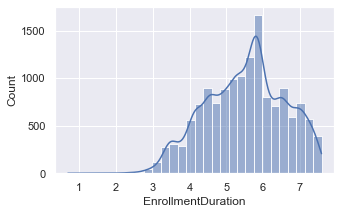

Age
Skewness: 0.20239445934744338


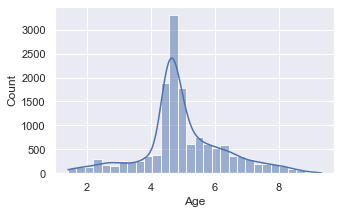

Income
Skewness: -0.7285973017477833


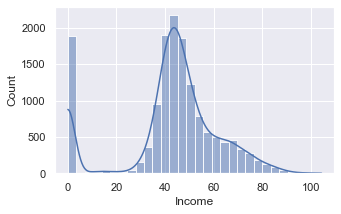

LastPeriodVisitingActivity
Skewness: 0.41710686421552884


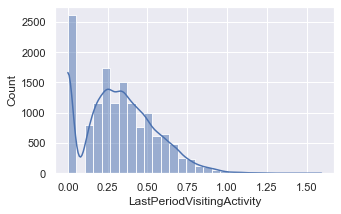

NumberOfRenewals
Skewness: 0.2089857622103864


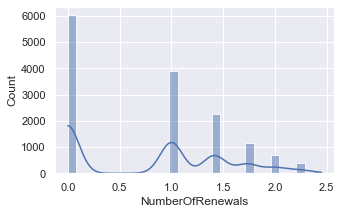

In [200]:
for k in ['NumberOfFrequencies', 'CostOfDay', 
          'CostOfVisit', 'RealNumberOfVisits', 
          'EnrollmentDuration', 'Age', 'Income',
          'LastPeriodVisitingActivity', 'NumberOfRenewals'
         ]:
    print(k)
    print("Skewness: {}".format(sc.skew(df_clustering[k])))
    plt.figure(figsize=(5, 3))
    sns.histplot(df_clustering[k], bins=30, kde=True)
    plt.show()

Way better result!

#### IQR and Zscore

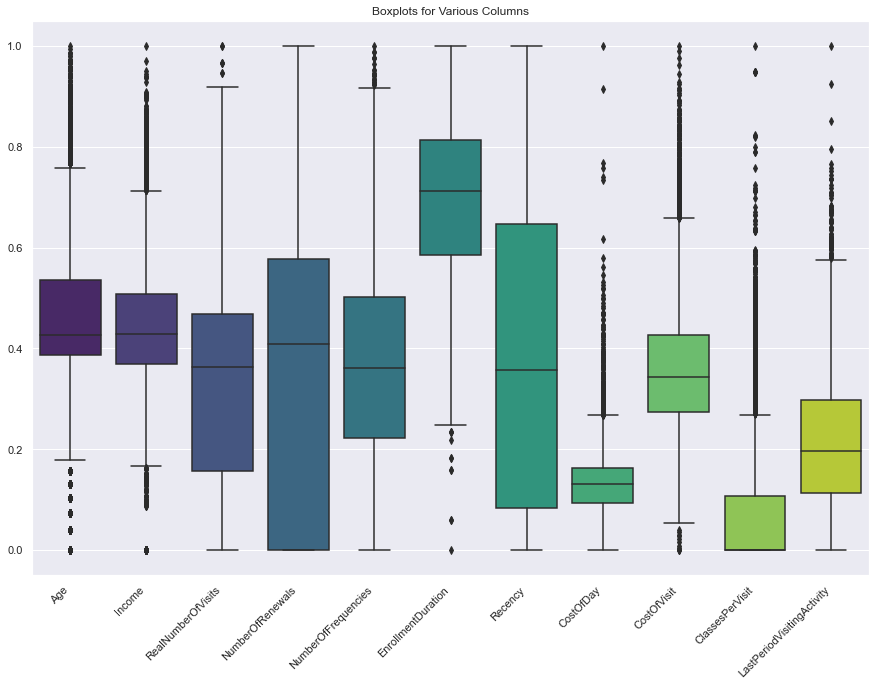

In [201]:

columns_to_plot = ['Age', 'Income', 'RealNumberOfVisits', 'NumberOfRenewals',
                   'NumberOfFrequencies', 
                   'EnrollmentDuration',  'Recency',
                   'CostOfDay', 'CostOfVisit', 'ClassesPerVisit',
                   'LastPeriodVisitingActivity']

scaler = MinMaxScaler()

# Create boxplots for each column
plt.figure(figsize=(15, 10))
sns.boxplot(data=pd.DataFrame(scaler.fit_transform(df_clustering[columns_to_plot]), columns = columns_to_plot), orient='v', palette='viridis')
plt.title('Boxplots for Various Columns')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

According to IQR method we have too many outliers - but we cannot just delete whole dataset, so we can use other techniques to deal with outliers

In [202]:
# Assuming df is your DataFrame with numerical columns
for k in range(len(df_clustering.columns)):
    i = df_clustering.columns[k]
    print(i)
    
    # IQR method
    Q1 = df_clustering[i].quantile(0.25)
    Q3 = df_clustering[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = (df_clustering[i] < Q1 - 1.5 * IQR) | (df_clustering[i] > Q3 + 1.5 * IQR)
    
    # Z-score method
    df_clustering['Zscore'] = (df_clustering[i] - df_clustering[i].mean()) / df_clustering[i].std()
    outliers_zscore = (df_clustering['Zscore'] > 3) | (df_clustering['Zscore'] < -3)
    
    print("Outliers (IQR) - number: {}, lower_bound: {}, upper_bound: {}".format(len(df_clustering[outliers_iqr])
          , np.max(df_clustering[df_clustering[i] < Q1 - 1.5 * IQR][i])
          , np.min(df_clustering[df_clustering[i] > Q3 + 1.5 * IQR][i])))
    
    print("Outliers (Z-score) - number: {}, lower_bound: {}, upper_bound: {}".format(len(df_clustering[outliers_zscore])
          , np.max(df_clustering[df_clustering['Zscore'] < -3][i])
          , np.min(df_clustering[df_clustering['Zscore'] > 3][i])))
    print("\n")
    df_clustering.drop(columns = ['Zscore'], inplace = True)

Age
Outliers (IQR) - number: 1574, lower_bound: 2.6457513110645907, upper_bound: 7.483314773547883
Outliers (Z-score) - number: 36, lower_bound: nan, upper_bound: 8.94427190999916


Income
Outliers (IQR) - number: 2589, lower_bound: 17.05872210923198, upper_bound: 74.43117626371358
Outliers (Z-score) - number: 1, lower_bound: nan, upper_bound: 104.35516278555652


RealNumberOfVisits
Outliers (IQR) - number: 7, lower_bound: nan, upper_bound: 4.204692619390966
Outliers (Z-score) - number: 5, lower_bound: nan, upper_bound: 4.290459441148391


NumberOfRenewals
Outliers (IQR) - number: 0, lower_bound: nan, upper_bound: nan
Outliers (Z-score) - number: 0, lower_bound: nan, upper_bound: nan


NumberOfFrequencies
Outliers (IQR) - number: 22, lower_bound: nan, upper_bound: 6.453624998892692
Outliers (Z-score) - number: 9, lower_bound: nan, upper_bound: 6.645090969505644


EnrollmentDuration
Outliers (IQR) - number: 11, lower_bound: 2.302585092994046, upper_bound: nan
Outliers (Z-score) - number

C:\Users\dggua\AppData\Local\Temp\ipykernel_23184\528244026.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Zscore'] = (df_clustering[i] - df_clustering[i].mean()) / df_clustering[i].std()
C:\Users\dggua\AppData\Local\Temp\ipykernel_23184\528244026.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering.drop(columns = ['Zscore'], inplace = True)
C:\Users\dggua\AppData\Local\Temp\ipykernel_23184\528244026.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

We see that Z-score in most cases we have upper boundary outliers and Z-score provide higher upper boundary, identifying less outliers. This seems to be more reasonable approach as almost all of our variables have distributions with heavy tails and we dont want to punish them too much for it. However, for some variables both approaches are too radical in outliers identification - for example, we will not remove 300 people using only one feature. We can experiment with boundaries as well since not all the variables we have are normally distributed - so we can keep more of tails

#### DBSCAN for outliers

Also we can use DBSCAN to find outliers - and then try to find outliers which we identified by many approaches

In [203]:

df_dbscan = df_clustering.copy()

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_clustering)


epsilon = 0.3
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df_dbscan['Cluster'] = dbscan.fit_predict(df_scaled)

outliers = df_dbscan[df_dbscan['Cluster'] == -1]
df_dbscan.set_index('Cluster', inplace = True)

pd.Series(dbscan.labels_).value_counts()


 1    8324
 0    6006
-1     175
dtype: int64

[0.0, 0.5711986642890533, 1.1423973285781066, 1.7135959928671598, 2.284794657156213, 2.8559933214452666, 3.4271919857343196, 3.998390650023373, 4.569589314312426, 5.140787978601479, 5.711986642890533, 0.0]
-1


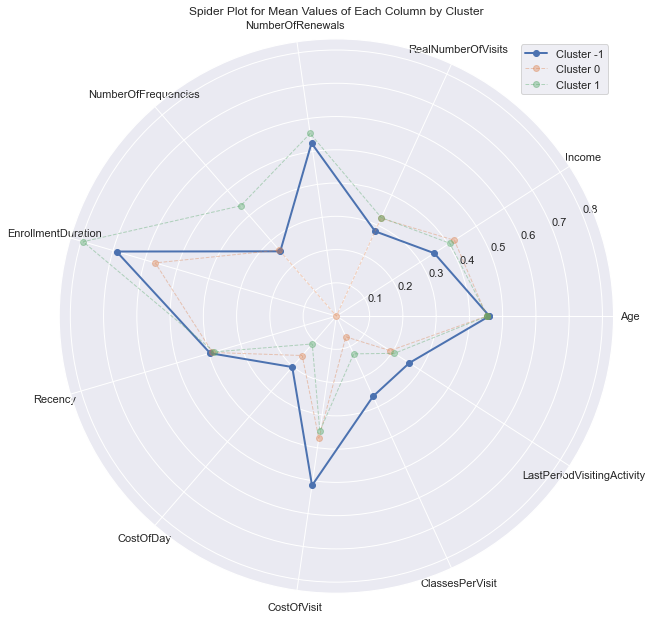

In [303]:
normalized_data = (df_dbscan - df_dbscan.min()) / (df_dbscan.max() - df_dbscan.min())

grouped_data = normalized_data.groupby(normalized_data.index).mean()

normalized_data = grouped_data

num_categories = len(grouped_data.columns)

angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
angles.append(angles[0])

plt.figure(figsize=(10, 10))
for i in range(len(normalized_data)):
    if normalized_data.index[i] == -1:
        print(angles)
        print(normalized_data.index[i])
        plt.polar(angles, values, marker='o', linestyle='-', linewidth=2, label=f'Cluster {normalized_data.index[i]}')
    else:
        plt.polar(angles, values, marker='o', linestyle='--', linewidth=1, alpha=0.4, label=f'Cluster {normalized_data.index[i]}')

plt.xticks(angles[:-1], grouped_data.columns)
plt.legend(loc='upper right')
plt.title('Spider Plot for Mean Values of Each Column by Cluster')

plt.show()


DBSCAN (with epsilon = 0.3 and min_samples = 5) tends to put classlovers with high cost of visit as outliers 

#### Visual approach

Let's try hand approach based on plots.

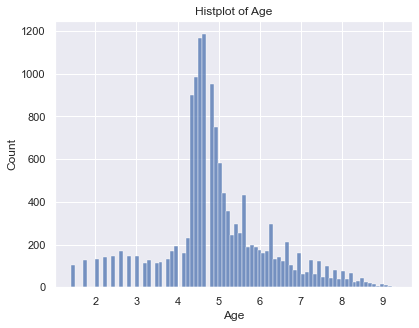

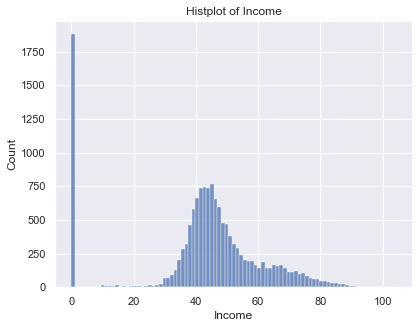

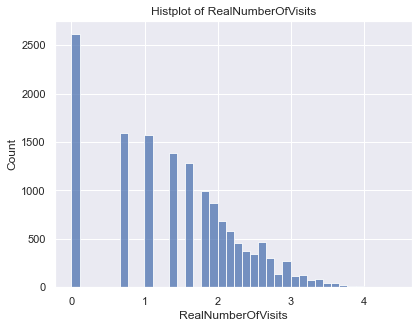

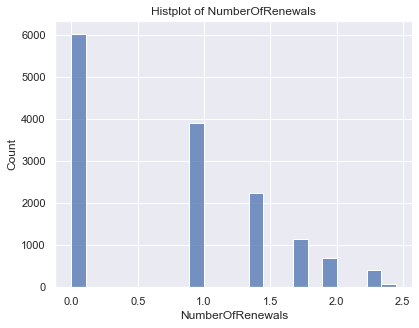

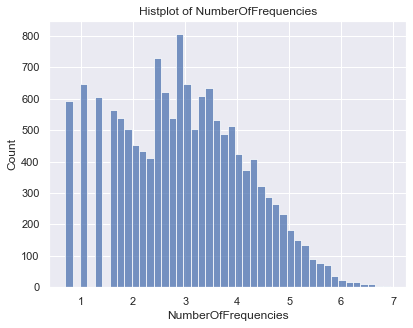

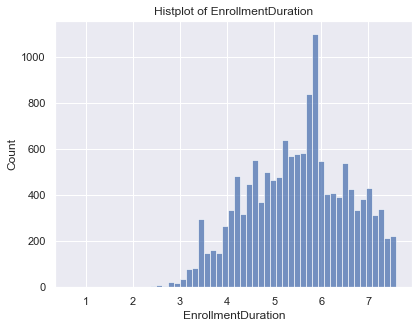

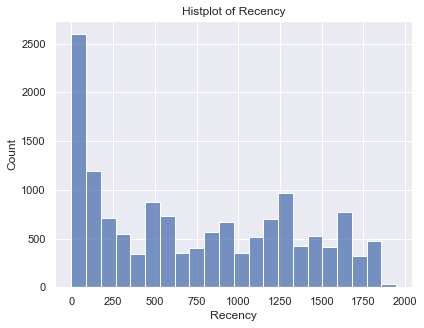

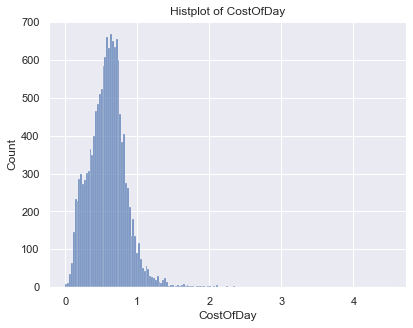

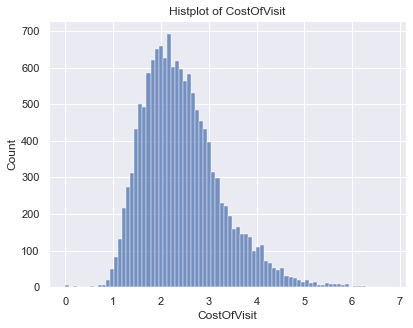

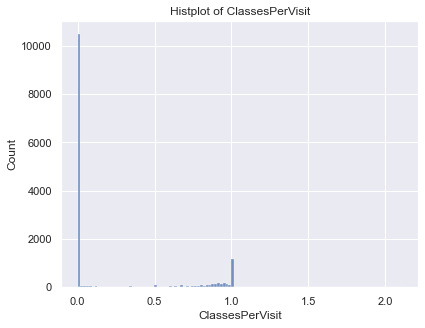

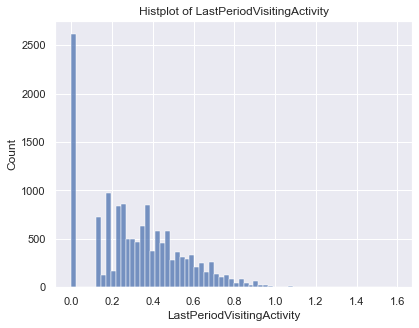

In [205]:
for i in (df_clustering.columns):
    sns.histplot(df_clustering, x = i)
    plt.title('Histplot of ' + str(i))
    plt.show()

In [206]:
df_clustering['outliers_hand'] = ((df_clustering['LastPeriodVisitingActivity'] > 1) 
            | (df_clustering['ClassesPerVisit'] > 1.5)
            | (df_clustering['CostOfVisit'] > 5.5)
            | (df_clustering['CostOfDay'] > 1.5)
            | (df_clustering['EnrollmentDuration'] < 2.5)
            | (df_clustering['NumberOfFrequencies'] > 6.5)
            | (df_clustering['RealNumberOfVisits'] > 4)
            | (df_clustering['Age'] > 9)
            | (df_clustering['Income'] > 90))

C:\Users\dggua\AppData\Local\Temp\ipykernel_23184\3326371141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['outliers_hand'] = ((df_clustering['LastPeriodVisitingActivity'] > 1)


#### Comparison and final solution

Let's combine all approaches and check what are the outliers. Before it We suggest to remove some columns since we should not deleted all old people or people with no income - they are important representatives of their groups. Same idea will go to some different columns. It is better to explore columns by hand and check for some really extreme values

In [207]:
for k in range(len(df_clustering.columns)-1):
    i = df_clustering.columns[k]

    # IQR method
    Q1 = df_clustering[i].quantile(0.25)
    Q3 = df_clustering[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr += (df_clustering[i] < Q1 - 1.5 * IQR) | (df_clustering[i] > Q3 + 1.5 * IQR)
    
    # Z-score method
    df_clustering['Zscore'] = (df_clustering[i] - df_clustering[i].mean()) / df_clustering[i].std()
    outliers_zscore += (df_clustering['Zscore'] > 3) | (df_clustering['Zscore'] < -3)
    df_clustering.drop(columns = ['Zscore'], inplace = True)
df_clustering['outliers_zscore'] = outliers_zscore
df_clustering['outliers_iqr'] = outliers_iqr
df_clustering['outliers_dbscan'] = list(pd.Series(df_dbscan.index).apply(lambda x: 1 if x == -1 else 0))
clear_output()
df_clustering

,Age,Income,RealNumberOfVisits,NumberOfRenewals,NumberOfFrequencies,EnrollmentDuration,Recency,CostOfDay,CostOfVisit,ClassesPerVisit,LastPeriodVisitingActivity,outliers_hand,outliers_zscore,outliers_iqr,outliers_dbscan
ID,,,,,,,,,,,,,,,
10000,7.745967,74.161985,1.098612,0.000000,2.302585,4.077537,1.0,0.932368,2.391308,0.777778,0.564333,False,False,True,0
10001,5.385165,51.283526,0.693147,1.414214,3.178054,5.988961,1568.0,0.790283,3.083504,0.043478,0.239594,False,False,False,0
10002,4.795832,44.497191,1.945910,0.000000,1.945910,3.433987,889.0,0.812411,1.983298,0.000000,0.446990,False,False,False,0
10003,3.000000,0.000000,1.386294,0.000000,3.044522,5.081404,283.0,0.678668,2.171337,0.100000,0.411461,False,False,True,0
10004,5.916080,65.726707,0.000000,1.732051,3.737670,6.658011,721.0,0.391834,2.312777,0.000000,0.000000,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,3.741657,0.000000,2.197225,1.732051,4.727388,7.044905,2.0,0.821712,2.641891,0.857143,0.479188,False,False,True,0
24938,6.244998,59.405387,1.386294,0.000000,4.060443,5.568345,1282.0,0.840460,1.950536,0.000000,0.221821,False,False,False,0
24939,4.472136,42.544095,2.197225,0.000000,1.945910,3.433987,946.0,0.897448,2.112231,0.000000,0.516140,False,False,False,0


In [208]:
pd.DataFrame(df_clustering[['outliers_iqr','outliers_zscore','outliers_hand', 'outliers_dbscan']].value_counts()).reset_index()

,outliers_iqr,outliers_zscore,outliers_hand,outliers_dbscan,0
0,False,False,False,0,9762
1,True,False,False,0,4249
2,True,True,True,0,164
3,True,True,False,0,118
4,True,True,True,1,78
5,True,False,False,1,70
6,True,False,True,0,37
7,True,True,False,1,16
8,False,False,False,1,10
9,True,False,True,1,1


In [209]:
pd.DataFrame(df_clustering[['outliers_iqr','outliers_zscore','outliers_hand']].value_counts()).reset_index()

,outliers_iqr,outliers_zscore,outliers_hand,0
0,False,False,False,9772
1,True,False,False,4319
2,True,True,True,242
3,True,True,False,134
4,True,False,True,38


We see that IQR, xscore and hand approaches provide almost similar solutions (IQR is most radical, zscore is subset of it and hand approach is mostly subset of zscore). The result is so since they use same idea - take each variable and identify values that lie far away from meadian, corners of distributions. DBSCAN is different since it takes into consideration all variables at once, but as mentioned before it focuses too much on age and number of renewals which is not that important. However, hand approach seems more reliable and gonna be final solution.

In [210]:
condition = (
    (df_clustering['LastPeriodVisitingActivity'] > 1) |
    (df_clustering['ClassesPerVisit'] > 1.5) |
    (df_clustering['CostOfVisit'] > 5.5) |
    (df_clustering['CostOfDay'] > 1.5) |
    (df_clustering['EnrollmentDuration'] < 2.5) |
    (df_clustering['NumberOfFrequencies'] > 6.5) |
    (df_clustering['RealNumberOfVisits'] > 4) |
    (df_clustering['Age'] > 9) |
    (df_clustering['Income'] > 90)
)

print('Percentage of outliers: {}'.format( np.round(len(df_clustering[condition])/len(df_clustering), 3)))
df_clustering = df_clustering.drop(df_clustering[condition].index)
df_clustering.drop(columns=['outliers_hand', 'outliers_zscore', 'outliers_iqr', 'outliers_dbscan'], inplace = True)

Percentage of outliers: 0.019


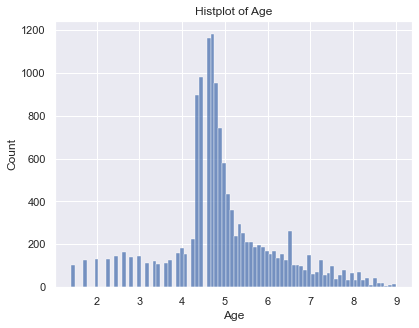

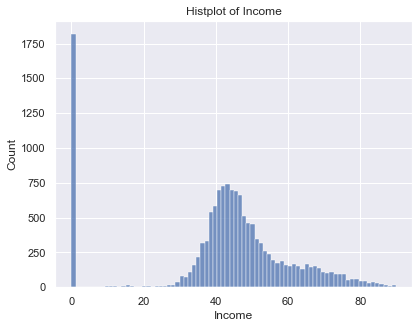

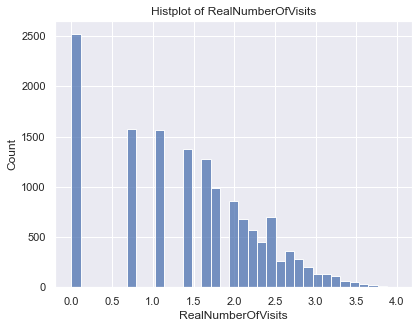

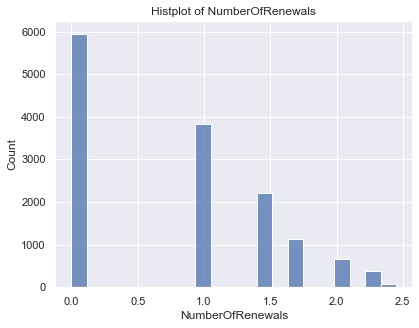

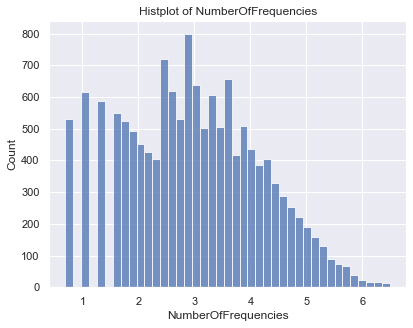

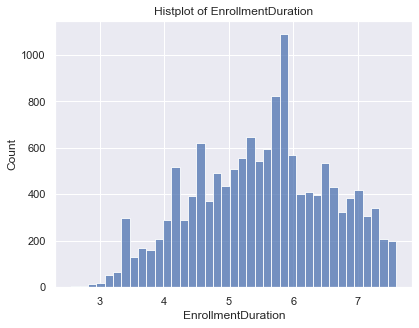

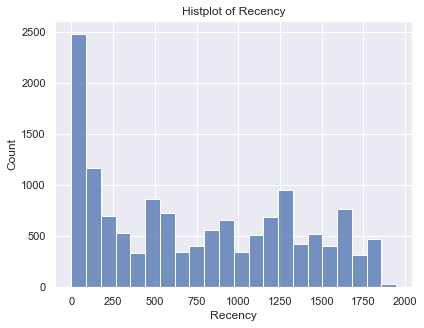

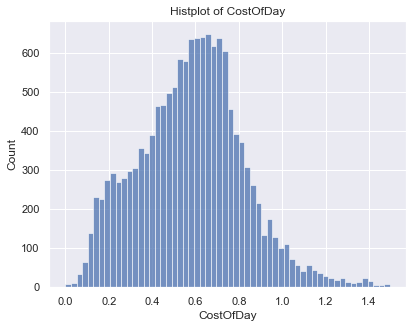

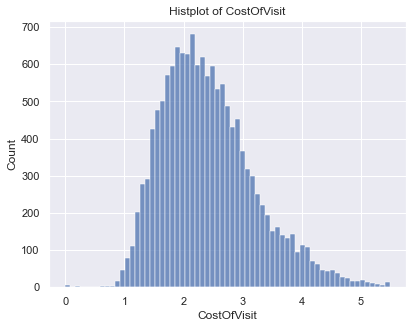

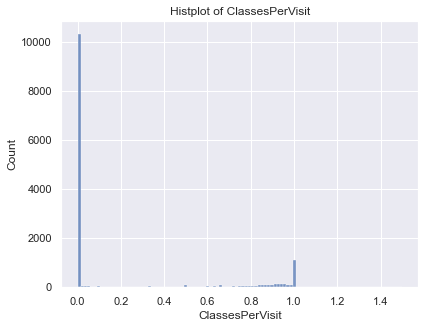

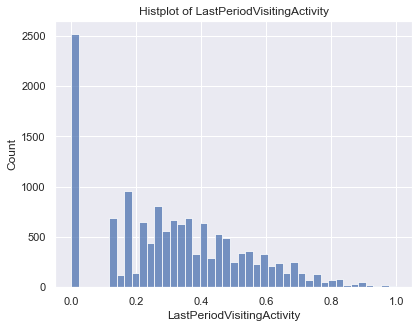

In [211]:
for i in (df_clustering.columns):
    sns.histplot(df_clustering, x = i)
    plt.title('Histplot of ' + str(i))
    plt.show()

### Scaling 

In [212]:
df_clustering.columns

Index(['Age', 'Income', 'RealNumberOfVisits', 'NumberOfRenewals',
       'NumberOfFrequencies', 'EnrollmentDuration', 'Recency', 'CostOfDay',
       'CostOfVisit', 'ClassesPerVisit', 'LastPeriodVisitingActivity'],
      dtype='object')

In [213]:
scaler_final = MinMaxScaler()
df_clustering = pd.DataFrame(scaler_final.fit_transform(df_clustering), columns = df_clustering.columns, index = df_clustering.index)

### EDA after all transformations and variables selection

## Clusterisation

#### SOM

In [214]:
np.random.seed(42)

sm = sompy.SOMFactory().build(
    df_clustering.values, 
    mapsize=[10, 10],  # NEEDS TO BE A LIST
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=df_clustering.columns
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.068000, quantization error: 3.477576

 epoch: 2 ---> elapsed time:  0.058000, quantization error: 3.125560

 epoch: 3 ---> elapsed time:  0.063000, quantization error: 3.048546

 epoch: 4 ---> elapsed time:  0.063000, quantization error: 3.014848

 epoch: 5 ---> elapsed time:  0.061000, quantization error: 2.996882

 epoch: 6 ---> elapsed time:  0.060000, quantization error: 2.986597

 epoch: 7 ---> elapsed time:  0.060000, quantization error: 2.981221

 epoch: 8 ---> elapsed time:  0.061000, quantization error: 2.977367

 epoch: 9 ---> elapsed time:  0.073000, quantization error: 2.973770

 epoch: 10 ---> elapsed time:  0.058000, quantization error: 2.970259

 epoch: 11 ---> elapsed time:  0.056000, quantization error: 2.966739

 epoch: 12 ---> elapsed time:  0.056000, quantization error: 2.963189

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.058000, quantization error: 1.859735

 epoch: 15 ---> elapsed time:  0.058000, quantization error: 1.859357

 epoch: 16 ---> elapsed time:  0.063000, quantization error: 1.858983

 epoch: 17 ---> elapsed time:  0.059000, quantization error: 1.858661

 epoch: 18 ---> elapsed time:  0.053000, quantization error: 1.858238

 epoch: 19 ---> elapsed time:  0.058000, quantization error: 1.857919

 epoch: 20 ---> elapsed time:  0.059000, quantization error: 1.857784

 epoch: 21 ---> elapsed time:  0.061000, quantization error: 1.857475

 epoch: 22 ---> elapsed time:  0.058000, quantization error: 1.857280

 epoch: 23 ---> elapsed time:  0.060000, quantization error: 1.857099

 epoch: 24 ---> elapsed time:  0.060000, quantization error: 1.856997

 epoch: 25 ---> elapsed time:  0.055000, quantization error: 1.856919

 epoch: 26 ---> elapsed time:  0.055000, quantization error: 1.856784

 epoch: 27 ---> elapsed time:  0.059000, quantization error: 1.856658

 epoch

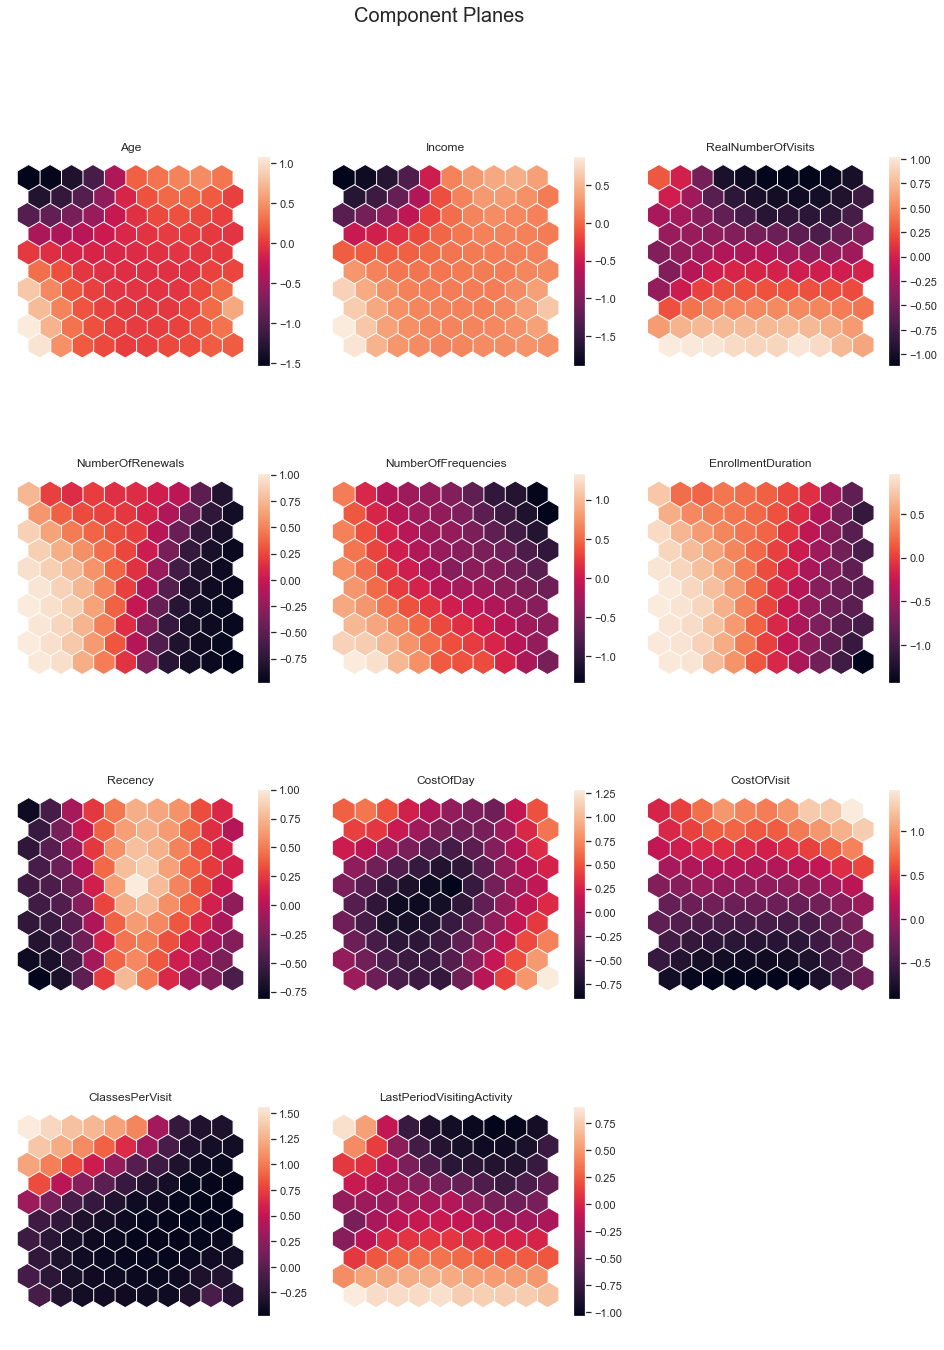

In [218]:
## You may need to play around with this setting if the hexagon tiling looks "weird"; 
## Improving the visualizations produced by SOMPY is not a straightforward process

plt.rcParams['figure.dpi'] = 72


# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12, 12, "", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

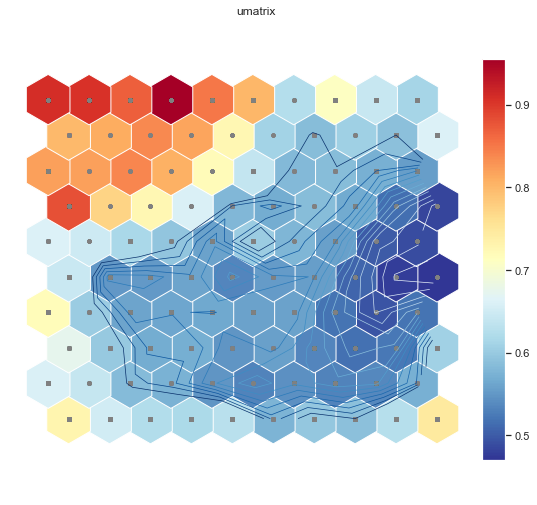

array([[0.90881616, 0.90510508, 0.86905009, 0.95543223, 0.85063365,
        0.80157133, 0.62568559, 0.70956409, 0.641357  , 0.61258534],
       [0.79967895, 0.81007823, 0.83793349, 0.81586123, 0.72463698,
        0.60909222, 0.58543178, 0.60603208, 0.58826873, 0.66024571],
       [0.81983964, 0.82003817, 0.83822976, 0.80672733, 0.72018573,
        0.63843979, 0.58109536, 0.58618389, 0.57245502, 0.55555738],
       [0.88028047, 0.7733731 , 0.72600908, 0.65878782, 0.57907119,
        0.56794643, 0.58538127, 0.56604726, 0.51503137, 0.48344676],
       [0.66107891, 0.64820036, 0.61651487, 0.5941398 , 0.5582232 ,
        0.60171919, 0.57733639, 0.55615263, 0.5009644 , 0.48939886],
       [0.64488014, 0.54881303, 0.55174205, 0.56087696, 0.5348542 ,
        0.55269617, 0.55506595, 0.50855878, 0.47757564, 0.47078124],
       [0.71826831, 0.60148262, 0.56073712, 0.56258653, 0.56370262,
        0.55868208, 0.55964693, 0.51837907, 0.49526061, 0.51845165],
       [0.67370319, 0.59817742, 0.5688316

In [219]:
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance=2,
    row_normalized=False,
    show_data=True, 
    contour=True, # Visualize isomorphic curves
    # blob=True
)

np.flip(UMAT[1], axis=1) # U-matrix values - they match with the plot colors

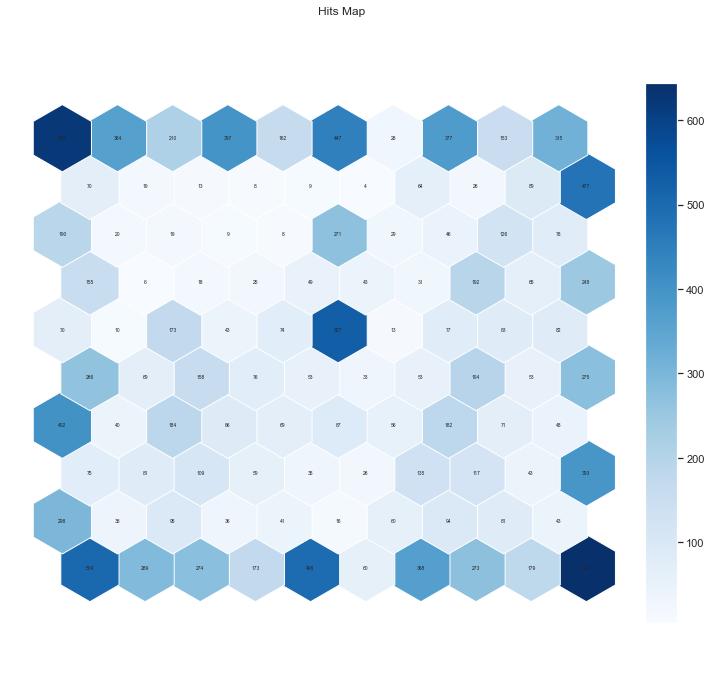

In [220]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=5, cmap="Blues")
plt.show()

In [221]:
for i in sm.cluster(20)

SyntaxError: expected ':' (8942203.py, line 1)

In [222]:
min(sm.find_bmu(df_clustering)[0])

4.0

In [223]:
i

'LastPeriodVisitingActivity'

In [224]:
map_clusters = sm.cluster(5)
som_clusters = []
for i in sm.find_bmu(df_clustering)[0]:
    som_clusters.append(map_clusters[int(i)])
    
len(som_clusters)

C:\Users\dggua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dggua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


14225

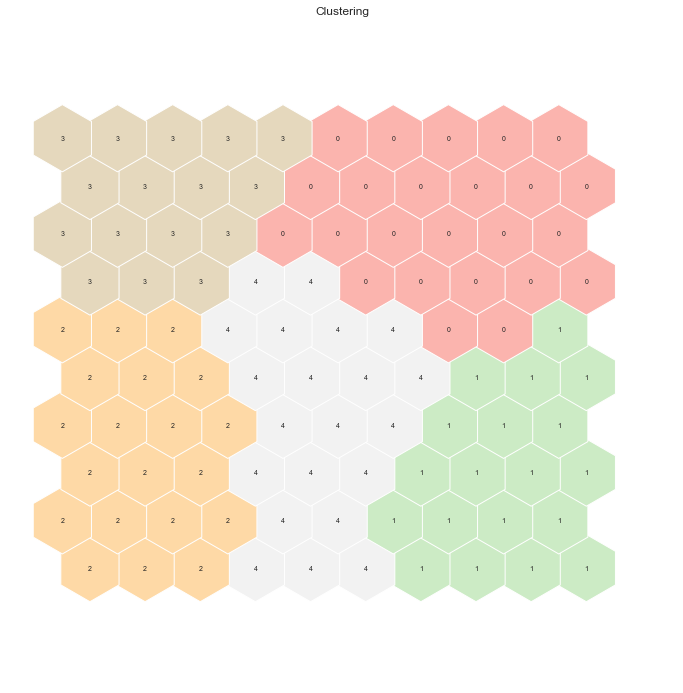

In [225]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
# kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
# nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
# sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [226]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss

In [227]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14225 entries, 10000 to 24941
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         14225 non-null  float64
 1   Income                      14225 non-null  float64
 2   RealNumberOfVisits          14225 non-null  float64
 3   NumberOfRenewals            14225 non-null  float64
 4   NumberOfFrequencies         14225 non-null  float64
 5   EnrollmentDuration          14225 non-null  float64
 6   Recency                     14225 non-null  float64
 7   CostOfDay                   14225 non-null  float64
 8   CostOfVisit                 14225 non-null  float64
 9   ClassesPerVisit             14225 non-null  float64
 10  LastPeriodVisitingActivity  14225 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [228]:
bandwidth = estimate_bandwidth(df_clustering, quantile=0.06, random_state=1, n_jobs=-1)

In [229]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_clustering)

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 9


In [231]:
df_clustering['Clusters_MeanS']= ms_labels

In [232]:
sst = get_ss(df_clustering)  # get total sum of squares
ssw_labels = df_clustering.groupby(by='Clusters_MeanS').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.8952


In [237]:
df_clustering = df_clustering.drop('Clusters_MeanS', axis=1)

Index(['Age', 'Income', 'RealNumberOfVisits', 'NumberOfRenewals',
       'NumberOfFrequencies', 'EnrollmentDuration', 'Recency', 'CostOfDay',
       'CostOfVisit', 'ClassesPerVisit', 'LastPeriodVisitingActivity',
       'Clusters_MeanS'],
      dtype='object')


In [238]:
dbscan = DBSCAN(eps=0.4, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_clustering)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 3


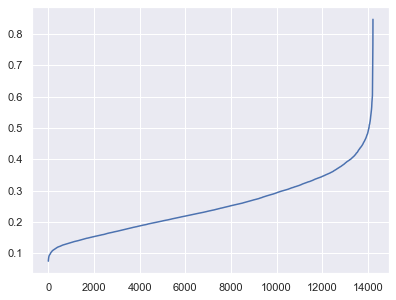

In [239]:
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df_clustering)
distances, _ = neigh.kneighbors(df_clustering)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [247]:
def get_scores_best(X, combinations):
    scores = []
    labels_score = []
    
    for i,(epsilon, min_sample) in enumerate(combinations):
        
        model = DBSCAN(eps=epsilon, min_samples=int(min_sample)).fit(X)
        labels = model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -=1
        #Check how many outliers
        if (num_clusters<2) or (num_clusters>50):
            scores.append(-100)
            labels_score.append('Does not work')
            print('Combination: min sample', min_sample, 'epsilon: ', epsilon, 'score: ', -100, 'Does not work')
        else:
            s = sillhoutte(X, labels)
            scores.append(s)
            labels_score.append(labels)
            print('Combination: min sample', min_sample, 'epsilon: ', epsilon, 'score: ', s, 'clusters: ', num_clusters)
    
    best_index = np.argmax(scores)
    
    return scores[best_index], labels_score[best_index], combinations[best_index]

In [257]:
epsilons = np.linspace(0.35, 0.5, num= 4)
min_samples = np.linspace(2,25, num=15)
print(epsilons)

[0.35 0.4  0.45 0.5 ]


In [258]:
combinations = list(itertools.product(epsilons, min_samples))

In [259]:
sc, lb, comb = get_scores_best(df_clustering,combinations)

Combination: min sample 2.0 epsilon:  0.35 score:  -0.09014577909510857 clusters:  19
Combination: min sample 3.642857142857143 epsilon:  0.35 score:  0.18633187113054617 clusters:  2
Combination: min sample 5.285714285714286 epsilon:  0.35 score:  0.08575640932490577 clusters:  3
Combination: min sample 6.928571428571429 epsilon:  0.35 score:  0.18643620878043257 clusters:  2
Combination: min sample 8.571428571428571 epsilon:  0.35 score:  0.185773666011567 clusters:  2
Combination: min sample 10.214285714285714 epsilon:  0.35 score:  0.1846399957802601 clusters:  2
Combination: min sample 11.857142857142858 epsilon:  0.35 score:  0.18395623133037253 clusters:  2
Combination: min sample 13.5 epsilon:  0.35 score:  0.1835947972040375 clusters:  2
Combination: min sample 15.142857142857142 epsilon:  0.35 score:  0.18195184694936123 clusters:  2
Combination: min sample 16.785714285714285 epsilon:  0.35 score:  0.18184485940352121 clusters:  2
Combination: min sample 18.428571428571427 ep

In [260]:
print(sc, lb,comb) 
print(len(set(lb)))

0.19298203435297143 [0 1 0 ... 0 1 1] (0.39999999999999997, 8.571428571428571)
3


In [261]:
gmm = GaussianMixture(n_components=4, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df_clustering)
labels_proba = gmm.predict_proba(df_clustering)

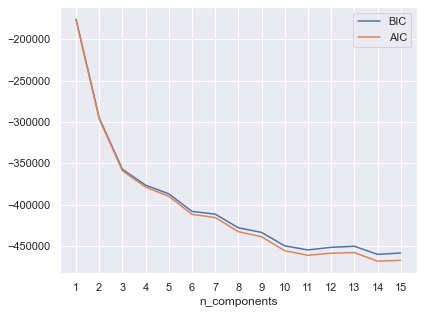

In [262]:
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_clustering)
          for n in n_components]

bic_values = [m.bic(df_clustering) for m in models]
aic_values = [m.aic(df_clustering) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [263]:
gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df_clustering)
labels_proba = gmm.predict_proba(df_clustering)

In [264]:
df_clustering['Clusters_DBSCAN']= lb

In [265]:
df_clustering['Clusters_MeanS']= ms_labels

In [266]:
df_clustering['Clusters_Gauss'] = gmm_labels

In [ ]:
def clustering_results():
    

In [274]:
df_results = df_clustering.copy()
columns = ['Age', 'Income', 'RealNumberOfVisits', 'NumberOfRenewals',
       'NumberOfFrequencies', 'EnrollmentDuration', 'Recency', 'CostOfDay',
       'CostOfVisit', 'ClassesPerVisit', 'LastPeriodVisitingActivity']
df_results[columns].mean()
clusters_name = ['Clusters_DBSCAN','Clusters_MeanS','Clusters_Gauss']

In [320]:
def spider_results(df_r, clusters_t, columns):
    
    angles = np.linspace(0, 2 * np.pi, len(columns), endpoint=False).tolist()
    angles.append(angles[0])
    for i in clusters_t:
        clusters = df_r[i].unique()
        plt.figure(figsize=(8,8))
        for clus in clusters:
            df_v = df_r.loc[df_r[i]==clus]
            df_mean = list(df_v[columns].mean().values)
            df_mean.append(df_mean[0])
            plt.polar(angles, df_mean, marker='o', linestyle='-', linewidth=2, label = str(clus))
        mesaje = 'Spider Plot for Mean Values of each cluster for: ' + i
        plt.xticks(angles[:-1], columns)
        plt.legend(loc='upper right')
        plt.title(mesaje)
        plt.show()

In [ ]:
def mean_scatter(df_r, clusters_t, columns):
    
    for i in clusters_t:
        clusters = df_r[i].unique()
        plt.figure(figsize=(8,8))

        for clus in clusters:
            df_v = df_r.loc[df_r[i]==clus]
            df_mean = list(df_v[columns].mean().values)
            df_mean.append(df_mean[0])
            plt.scatter(df_mean, )
        mesaje = 'Spider Plot for Mean Values of each cluster for: ' + i
        plt.legend(loc='upper right')
        plt.title(mesaje)
        plt.show()

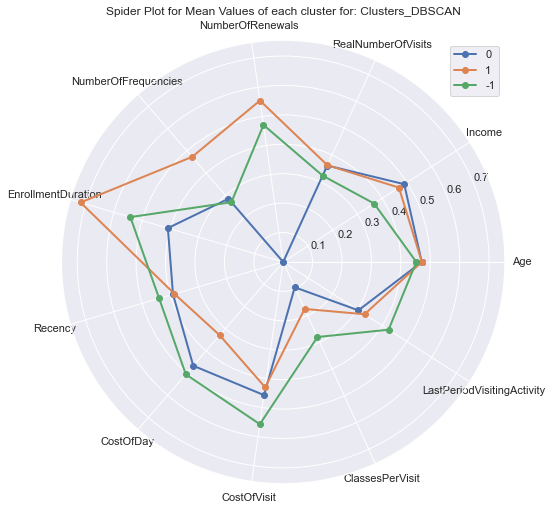

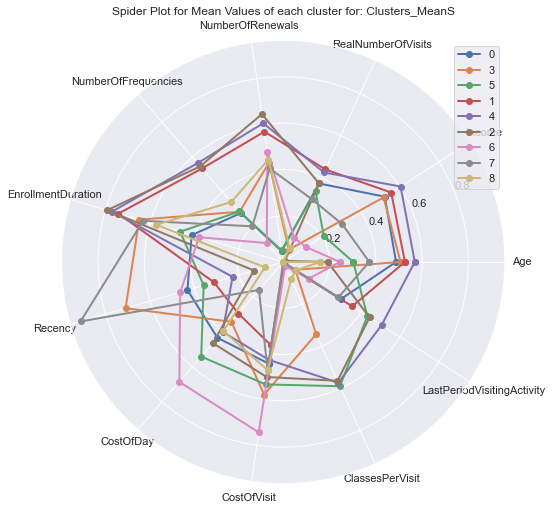

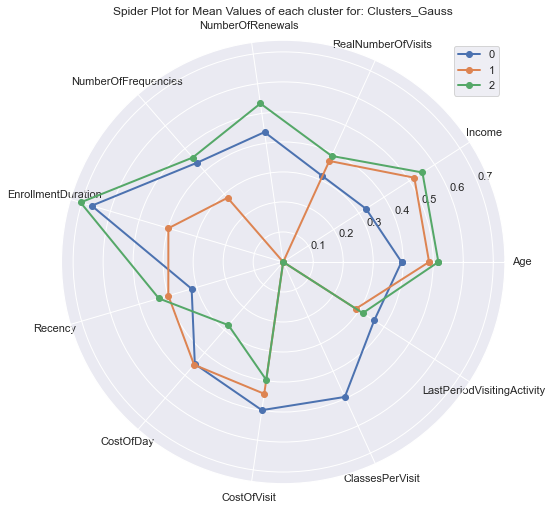

In [321]:
spider_results(df_results,clusters_name, columns )